In [ ]:
#from mlens.ensemble import SuperLearner
#from mlens.metrics.metrics import rmse
#!pip install --upgrade scikit-learn

#from imblearn.over_sampling import BorderlineSMOTE
#!pip install imbalanced-learn

#!pip uninstall scikit-learn
#!pip install scikit-learn




In [1]:
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# balance data
from imblearn.over_sampling import BorderlineSMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#from mlens.ensemble import SuperLearner
from sklearn.neural_network import MLPClassifier

# evaluations  -plot_roc_curve,
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,  roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/CHURN_pred_PROJECT')

import csv
train = pd.read_csv("/content/drive/My Drive/CHURN_pred_PROJECT/cell2celltrain.csv")
test = pd.read_csv("/content/drive/My Drive/CHURN_pred_PROJECT/cell2cellholdout.csv")


Mounted at /content/drive


In [3]:
train.shape

(51047, 58)

In [4]:

train.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [5]:
for i in train.columns:         # check if the data type of the values in that column is 'object', which typically indicates categorical data in pandas.
      if train[i].dtype=='object':
            print(pd.DataFrame(train[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1684
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
OHIRAV330            1
OMANEW515            1
KCYHES316            1
AIRGEO843            1
NCRDNN910            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
         Homeownership
Known            33987
Unknown          17060
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     Ha

##**Data Analysis**

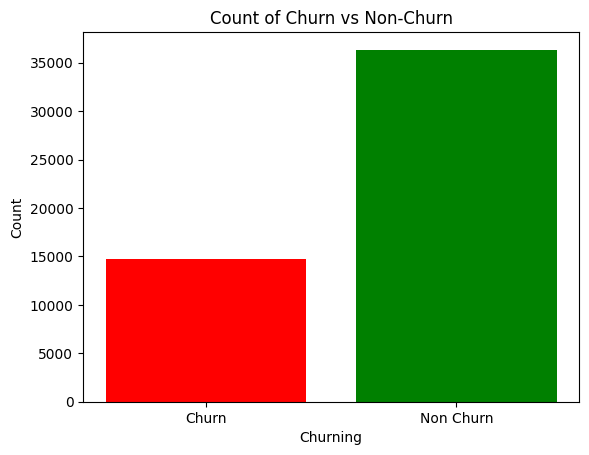

In [6]:
churn = train[train['Churn'] == 'Yes'].shape[0]
non_churn = train[train['Churn'] == 'No'].shape[0]

# Creating bar chart
plt.bar(['Churn', 'Non Churn'], [churn, non_churn], color=['red', 'green'])
plt.xlabel('Churning')
plt.ylabel('Count')
plt.title('Count of Churn vs Non-Churn')
plt.show()


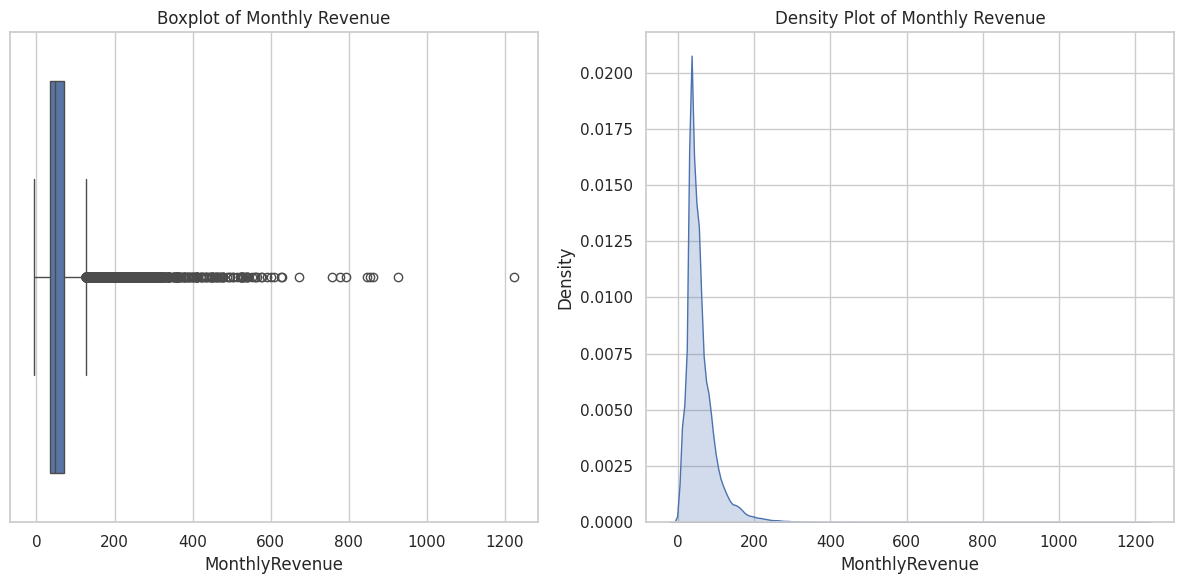

In [7]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Creating subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Boxplot
sns.boxplot(x='MonthlyRevenue', data=train, ax=axs[0])
axs[0].set_title('Boxplot of Monthly Revenue')

# Density plot
sns.kdeplot(train['MonthlyRevenue'], shade=True, ax=axs[1])
axs[1].set_title('Density Plot of Monthly Revenue')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [8]:
train.drop('CustomerID',axis=1, inplace=True)

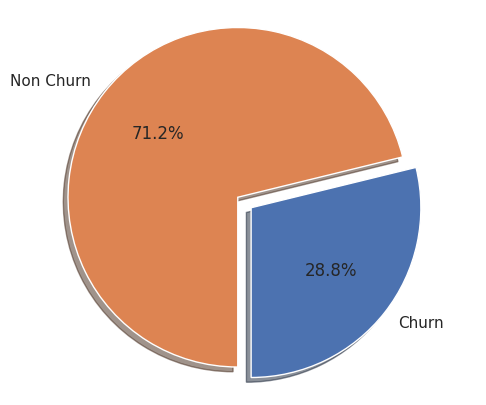

In [9]:
churn=train[train['Churn']=='Yes'].shape[0]
non_churn= train[train['Churn']=='No'].shape[0]

slices=[churn,non_churn]
labels=['Churn','Non Churn']
explode=[0.1,0]

fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')
plt.show()

*Customer churn is 28.8%. The data is IMBalanced.*

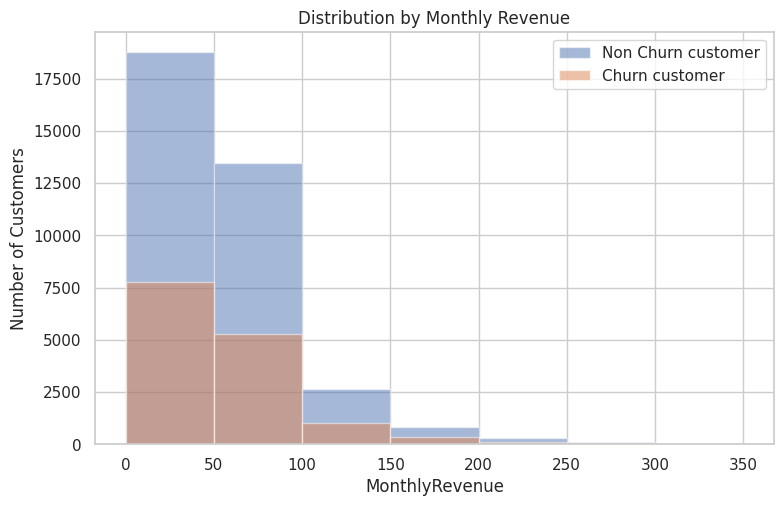

In [10]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(train[train['Churn']=='No']['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350],alpha=0.5, label='Non Churn customer')
plt.hist(train[train['Churn']=='Yes']['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350],alpha=0.5,label='Churn customer')
plt.ylabel("Number of Customers")
plt.xlabel("MonthlyRevenue")
plt.legend()
plt.tight_layout()
plt.title('Distribution by Monthly Revenue')
plt.show()


compares the distribution of monthly revenue between churn customers ('Yes', mud) and non-churn customers ('No', blue).

In [11]:
tenure_churn = train.MonthsInService[train.Churn == 'Yes'].value_counts()
tenure_no_churn = train.MonthsInService[train.Churn == 'No'].value_counts()
tenure = pd.merge(tenure_churn.reset_index(), tenure_no_churn.reset_index(), on='index')
tenure = tenure.sort_values(by='index')
tenure = tenure.reset_index().drop(columns='level_0')
tenure.columns

Index(['index', 'MonthsInService_x', 'MonthsInService_y'], dtype='object')

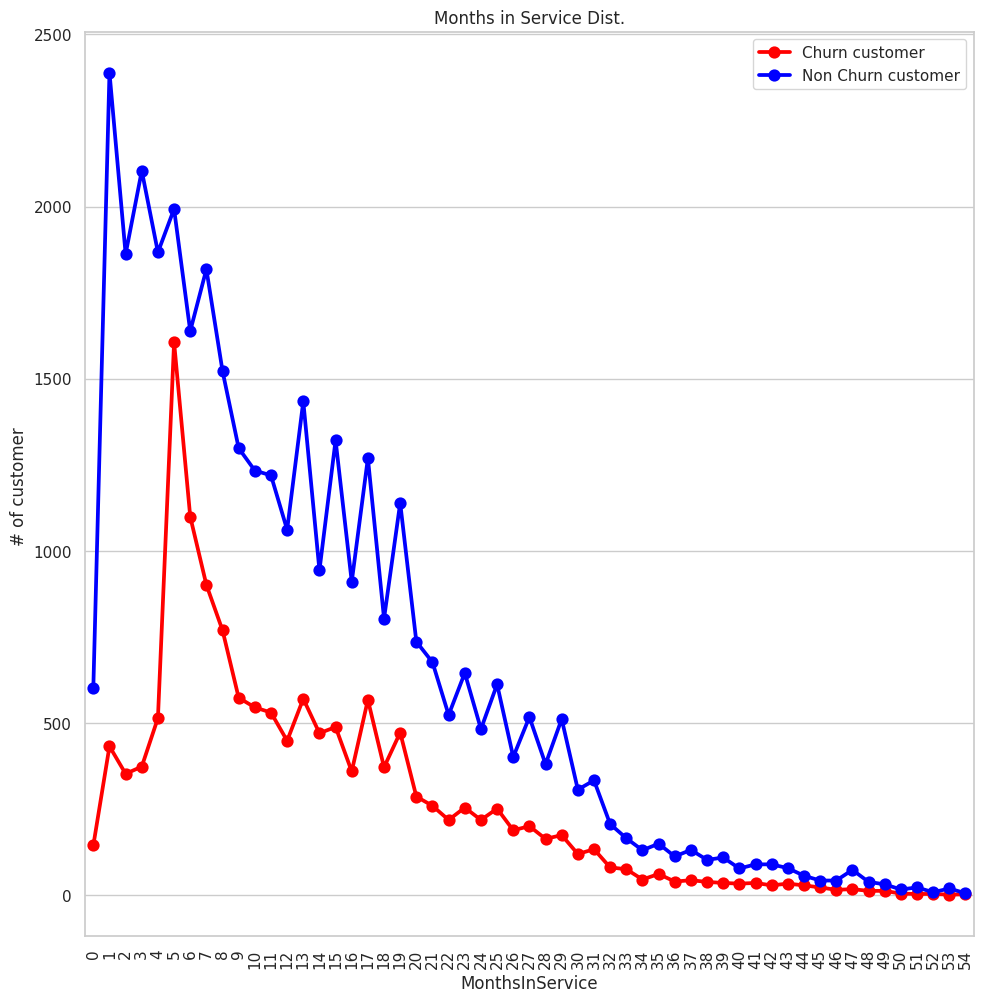

In [12]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.pointplot(x=tenure.index, y=tenure.MonthsInService_x, color='red',label='Churn customer')
sns.pointplot(x=tenure.index, y=tenure.MonthsInService_y, color='blue',label='Non Churn customer')
plt.xticks(rotation=90)
plt.ylabel("# of customer ")
plt.xlabel("MonthsInService")
plt.legend()
plt.tight_layout()
plt.title('Months in Service Dist.')
plt.show()

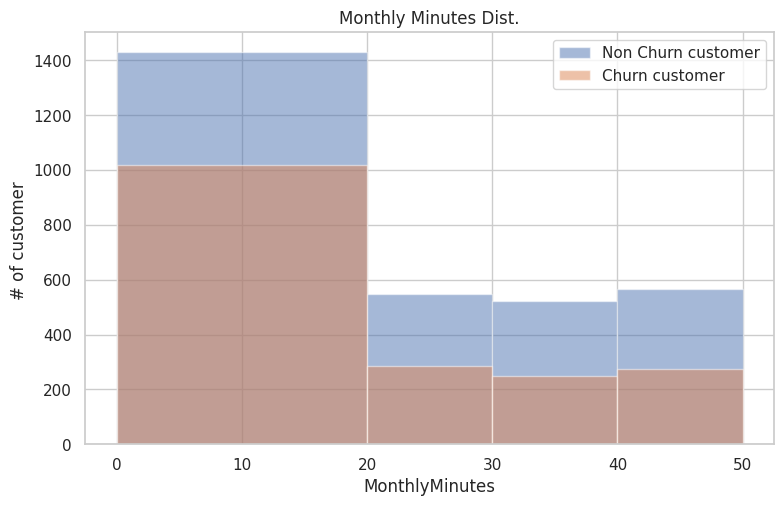

In [13]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(train[train['Churn']=='No']['MonthlyMinutes'],bins=[0,20,30,40,50],alpha=0.5, label='Non Churn customer')
plt.hist(train[train['Churn']=='Yes']['MonthlyMinutes'],bins=[0,20,30,40,50],alpha=0.5,label='Churn customer')
plt.ylabel("# of customer ")
plt.xlabel("MonthlyMinutes")
plt.legend()
plt.tight_layout()
plt.title('Monthly Minutes Dist.')
plt.show()

In [14]:
train['HandsetPrice'] = train['HandsetPrice'].replace('Unknown', np.nan)
test['HandsetPrice'] = test['HandsetPrice'].replace('Unknown', np.nan)

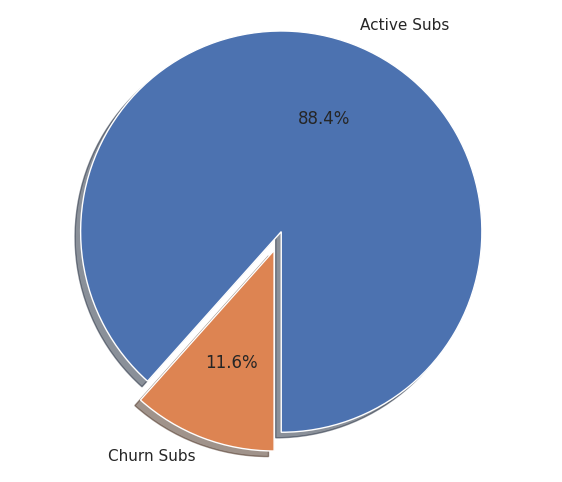

In [15]:
#The customer can have multiple subscriptions and can close one of the subscriptions.

train['ChurnSubs']=train['UniqueSubs']-train['ActiveSubs']


# There are no columns in the data set indicating the loss of subscription (ChurnSubs).
# This column is obtained when active subscriptions are subtracted from the number of subscriptions owned by the customer.

slices=[train['ActiveSubs'].sum(),train['ChurnSubs'].sum()]
labels=['Active Subs','Churn Subs']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')
plt.show()


# Pie chart used to show how many subscribers are active and how many have lost subscribers

Number of customers making calls to retention team: 1745
Number of customers lost after calls : 786
Number of customers not lost after making calls : 959
Success rate of retention calls % : 55


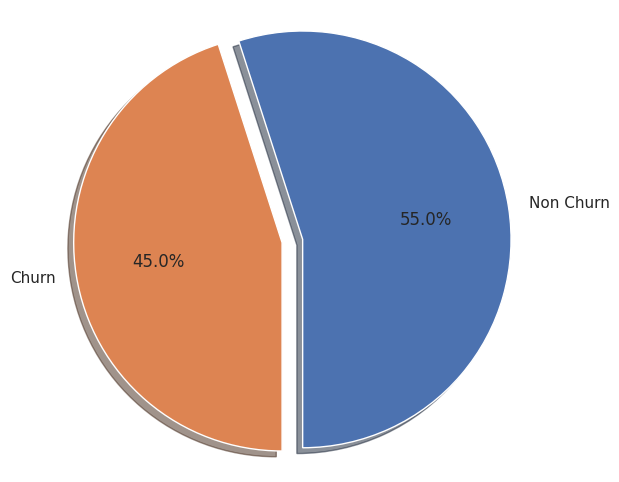

In [16]:
retention_df=train[train['MadeCallToRetentionTeam']=='Yes']
print ("Number of customers making calls to retention team: {}".format(train[train['MadeCallToRetentionTeam']=='Yes'].shape[0]))
print("Number of customers lost after calls : {}".format(train[(train['MadeCallToRetentionTeam']=='Yes') & (train['Churn']=='Yes')].shape[0]))
print("Number of customers not lost after making calls : {}".format(train[(train['MadeCallToRetentionTeam']=='Yes') & (train['Churn']=='No')].shape[0]))
print ("Success rate of retention calls % : {}".format(round(100*560/1017)))

slices=[retention_df[retention_df['Churn']=='No'].shape[0],retention_df[retention_df['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')
plt.show()


In [17]:
retention_offer=train[train['RetentionOffersAccepted']>0]

The number of customers who accepted the retention call offer : 881
Number of customers lost after accepting the retention call: 362
Number of customers not lost after accepting the retention call : 519
Success rate of the retention call proposal: 0.5891032917139614


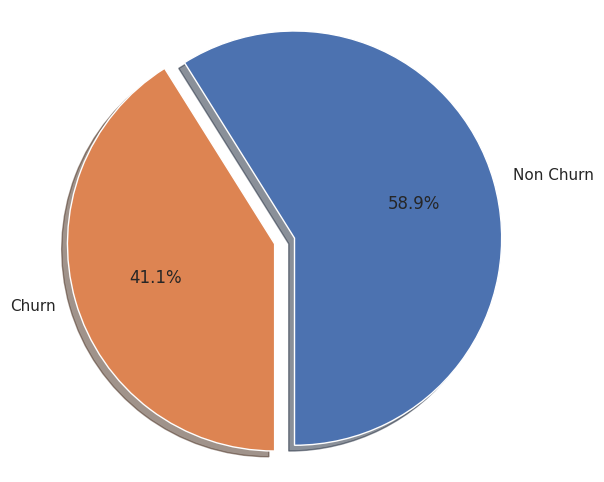

In [18]:
print("The number of customers who accepted the retention call offer : {}".format(retention_offer.shape[0]))
print("Number of customers lost after accepting the retention call: {}".format(retention_offer[retention_offer['Churn']=='Yes'].shape[0]))
print("Number of customers not lost after accepting the retention call : {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]))
print("Success rate of the retention call proposal: {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]/retention_offer.shape[0]))

slices=[retention_offer[retention_offer['Churn']=='No'].shape[0],retention_offer[retention_offer['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')
plt.show()



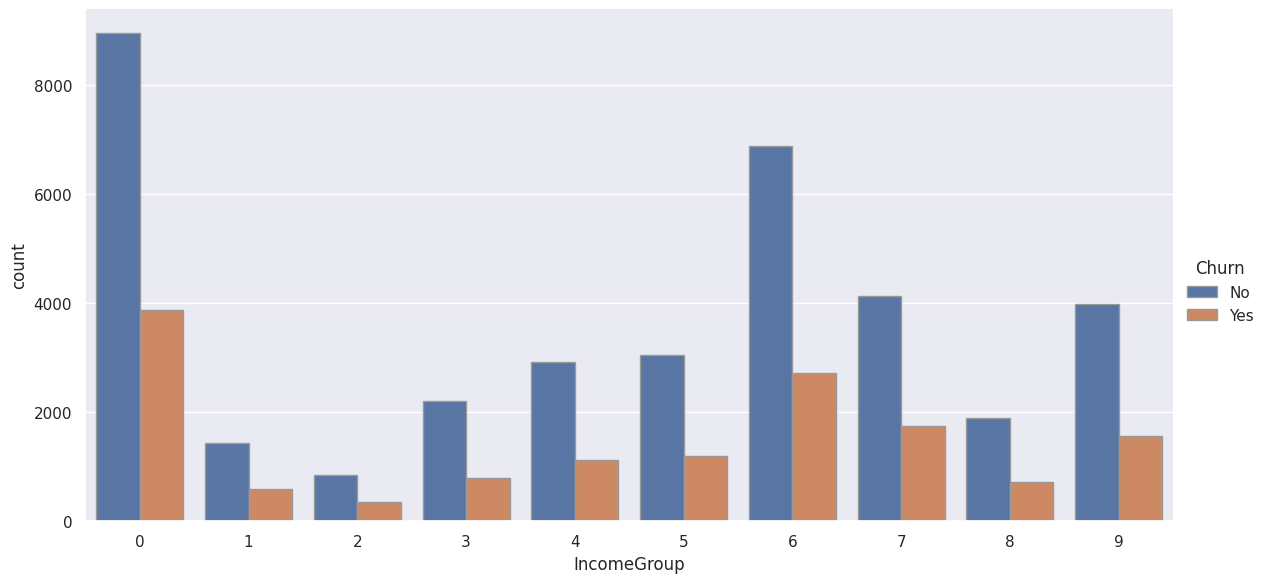

In [19]:
sns.set(style="darkgrid")
sns.catplot(x="IncomeGroup", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=6, aspect=2);

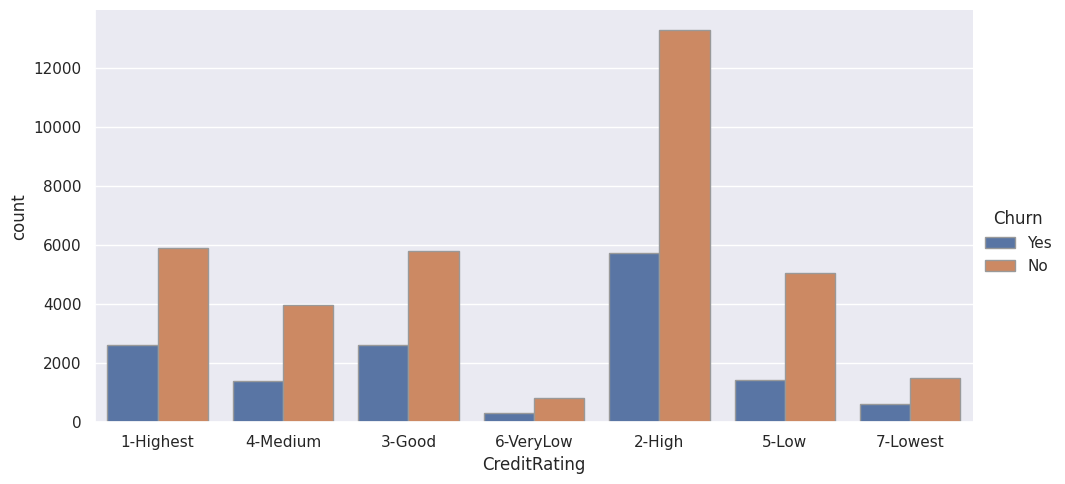

In [20]:
sns.set(style="darkgrid")
sns.catplot(x="CreditRating", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=5, aspect=2);

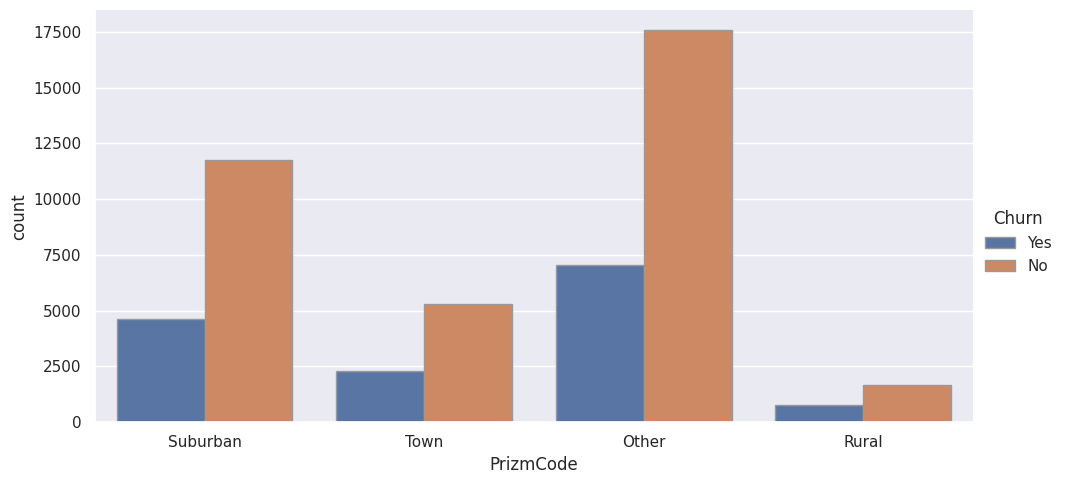

In [21]:
sns.set(style="darkgrid")
sns.catplot(x="PrizmCode", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=5, aspect=2);


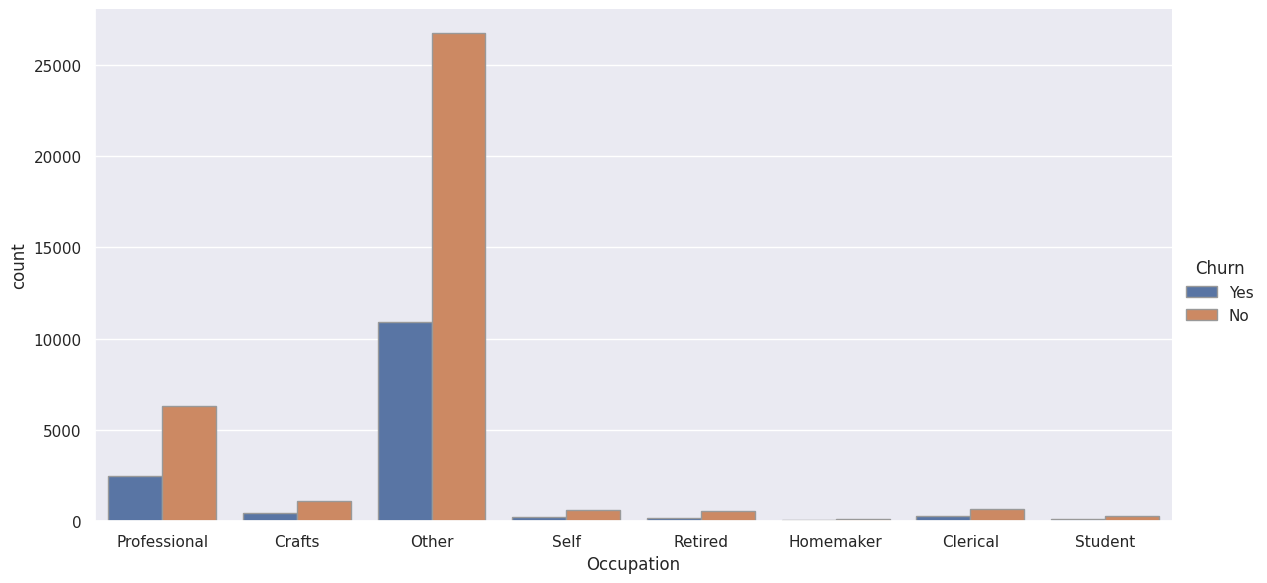

In [22]:
sns.set(style="darkgrid")
sns.catplot(x="Occupation", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=6, aspect=2);


In [23]:
print("Categorical Var. : {}".format(train.select_dtypes(exclude=['int', 'float']).columns))

print("Numeric Var. : {}".format(train.select_dtypes(include=['int', 'float']).columns))

Categorical Var. : Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')
Numeric Var. : Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'Active

## **Missing Values**

In [24]:
train.columns[train.isnull().any()]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'],
      dtype='object')

In [25]:
test.columns[test.isnull().any()]

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],
      dtype='object')

In [26]:
train_missings=train.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'], axis=1)

In [27]:
test_missings=test.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],axis=1)

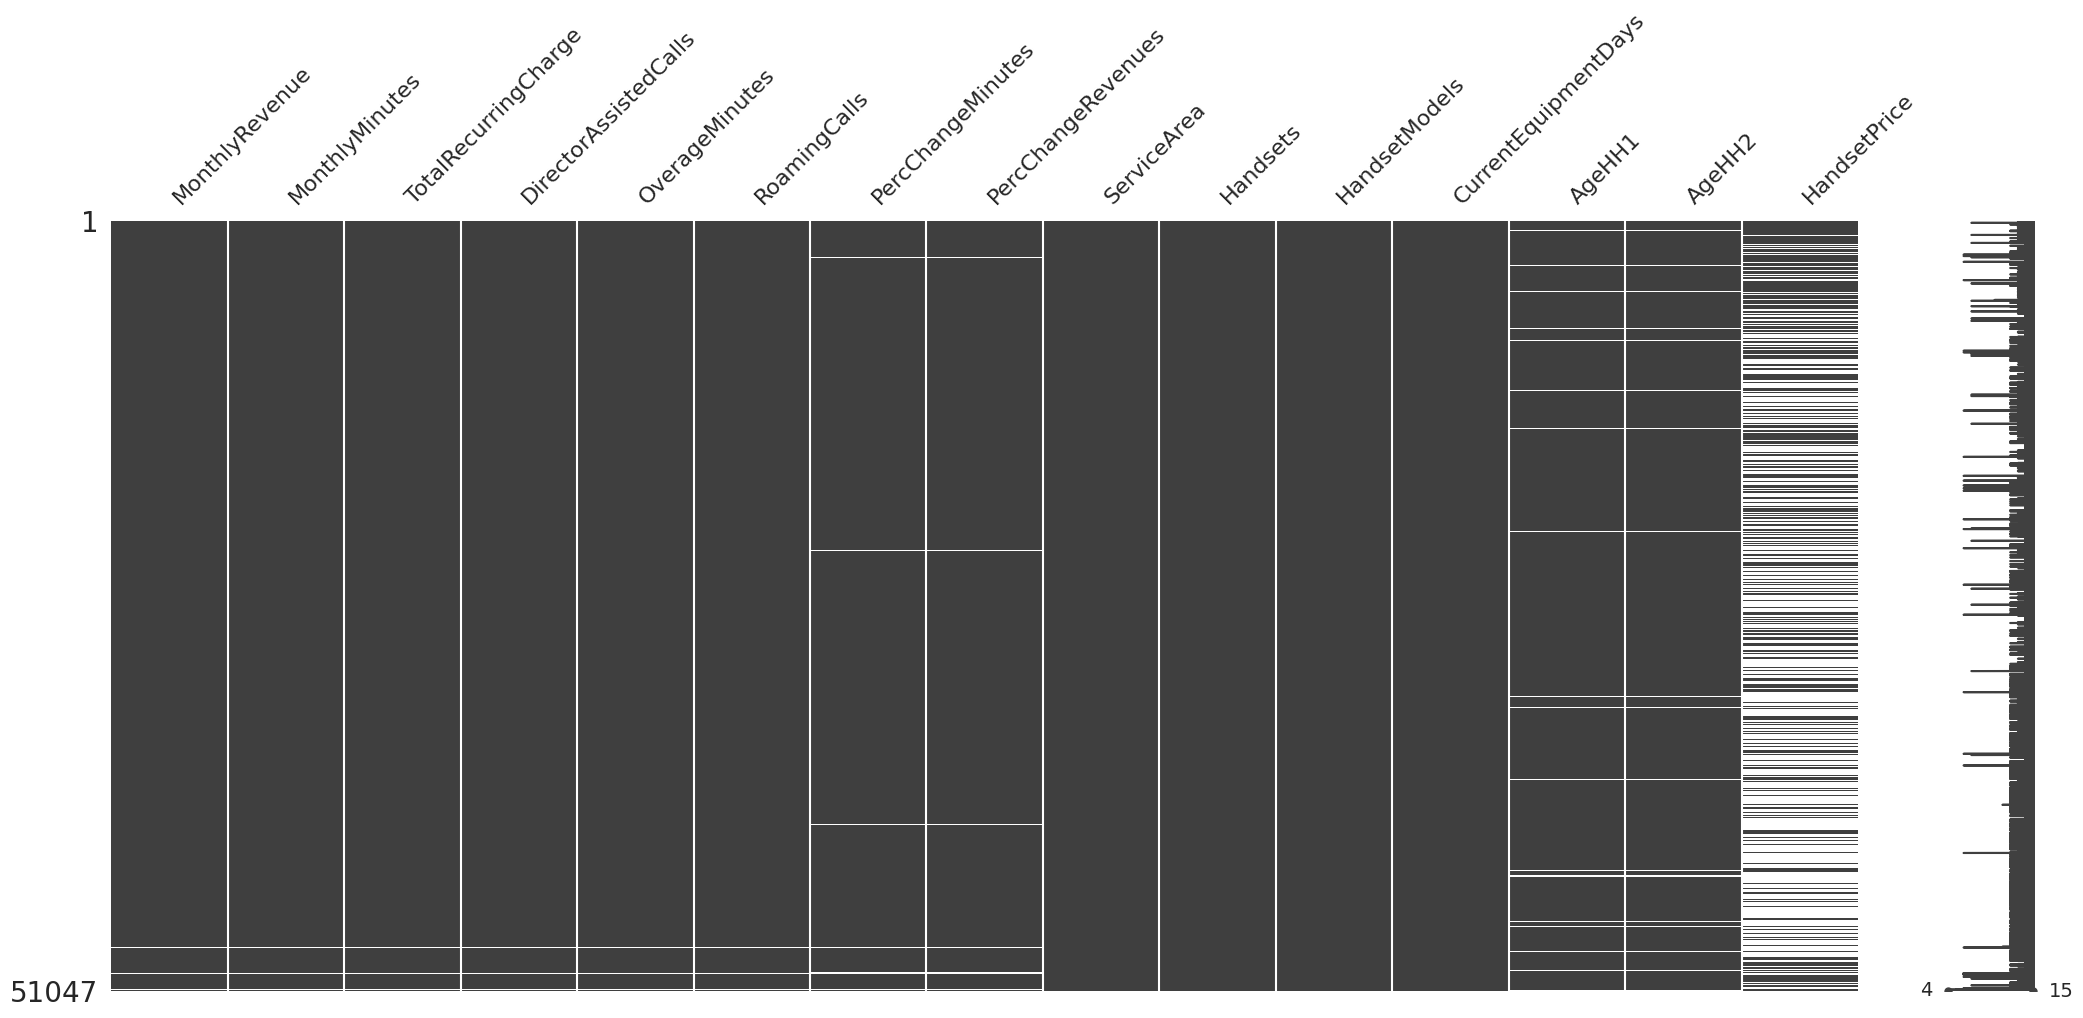

In [28]:
msno.matrix(train_missings);

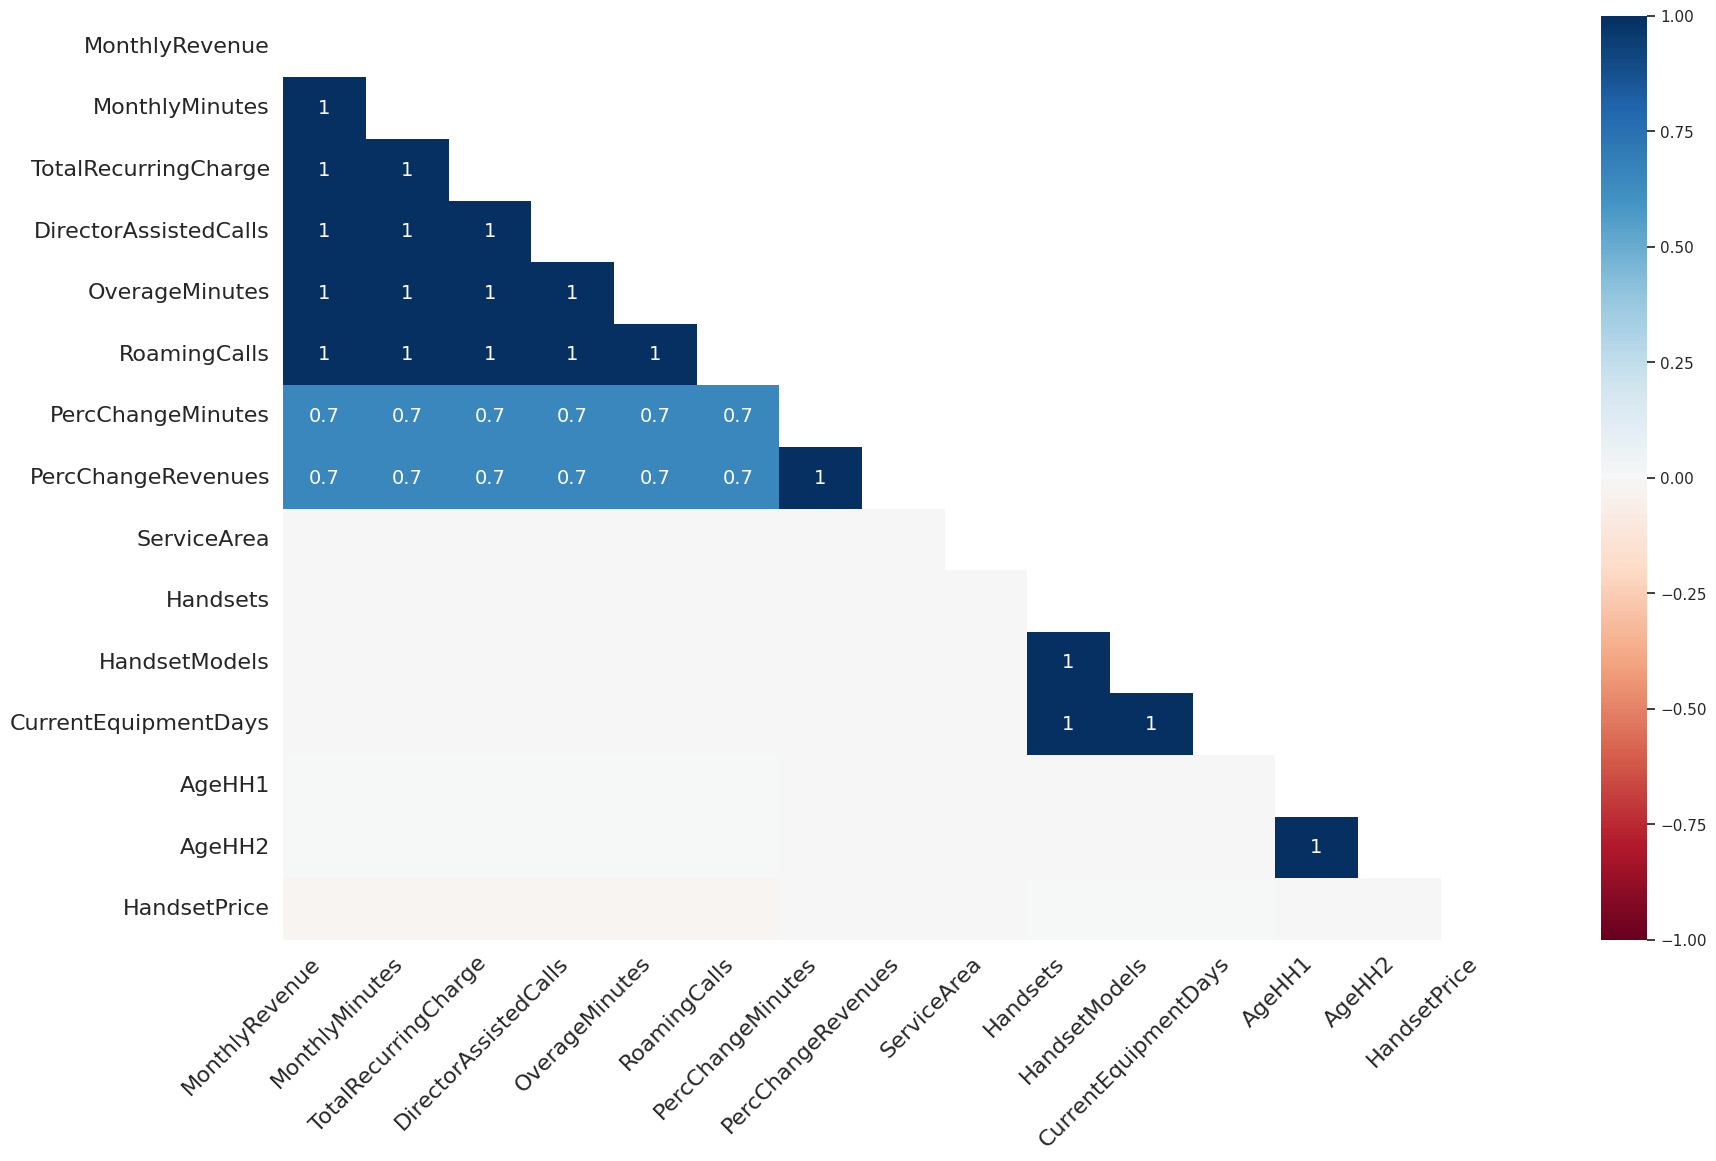

In [29]:
msno.heatmap(train_missings); #A value near -1 means if one variable appears then the other variable is very likely to be missing.
                    #A value near 0 means there is no dependence between the occurrence of missing values of two variables.
                    #A value near 1 means if one variable appears then the other variable is very likely to be present.


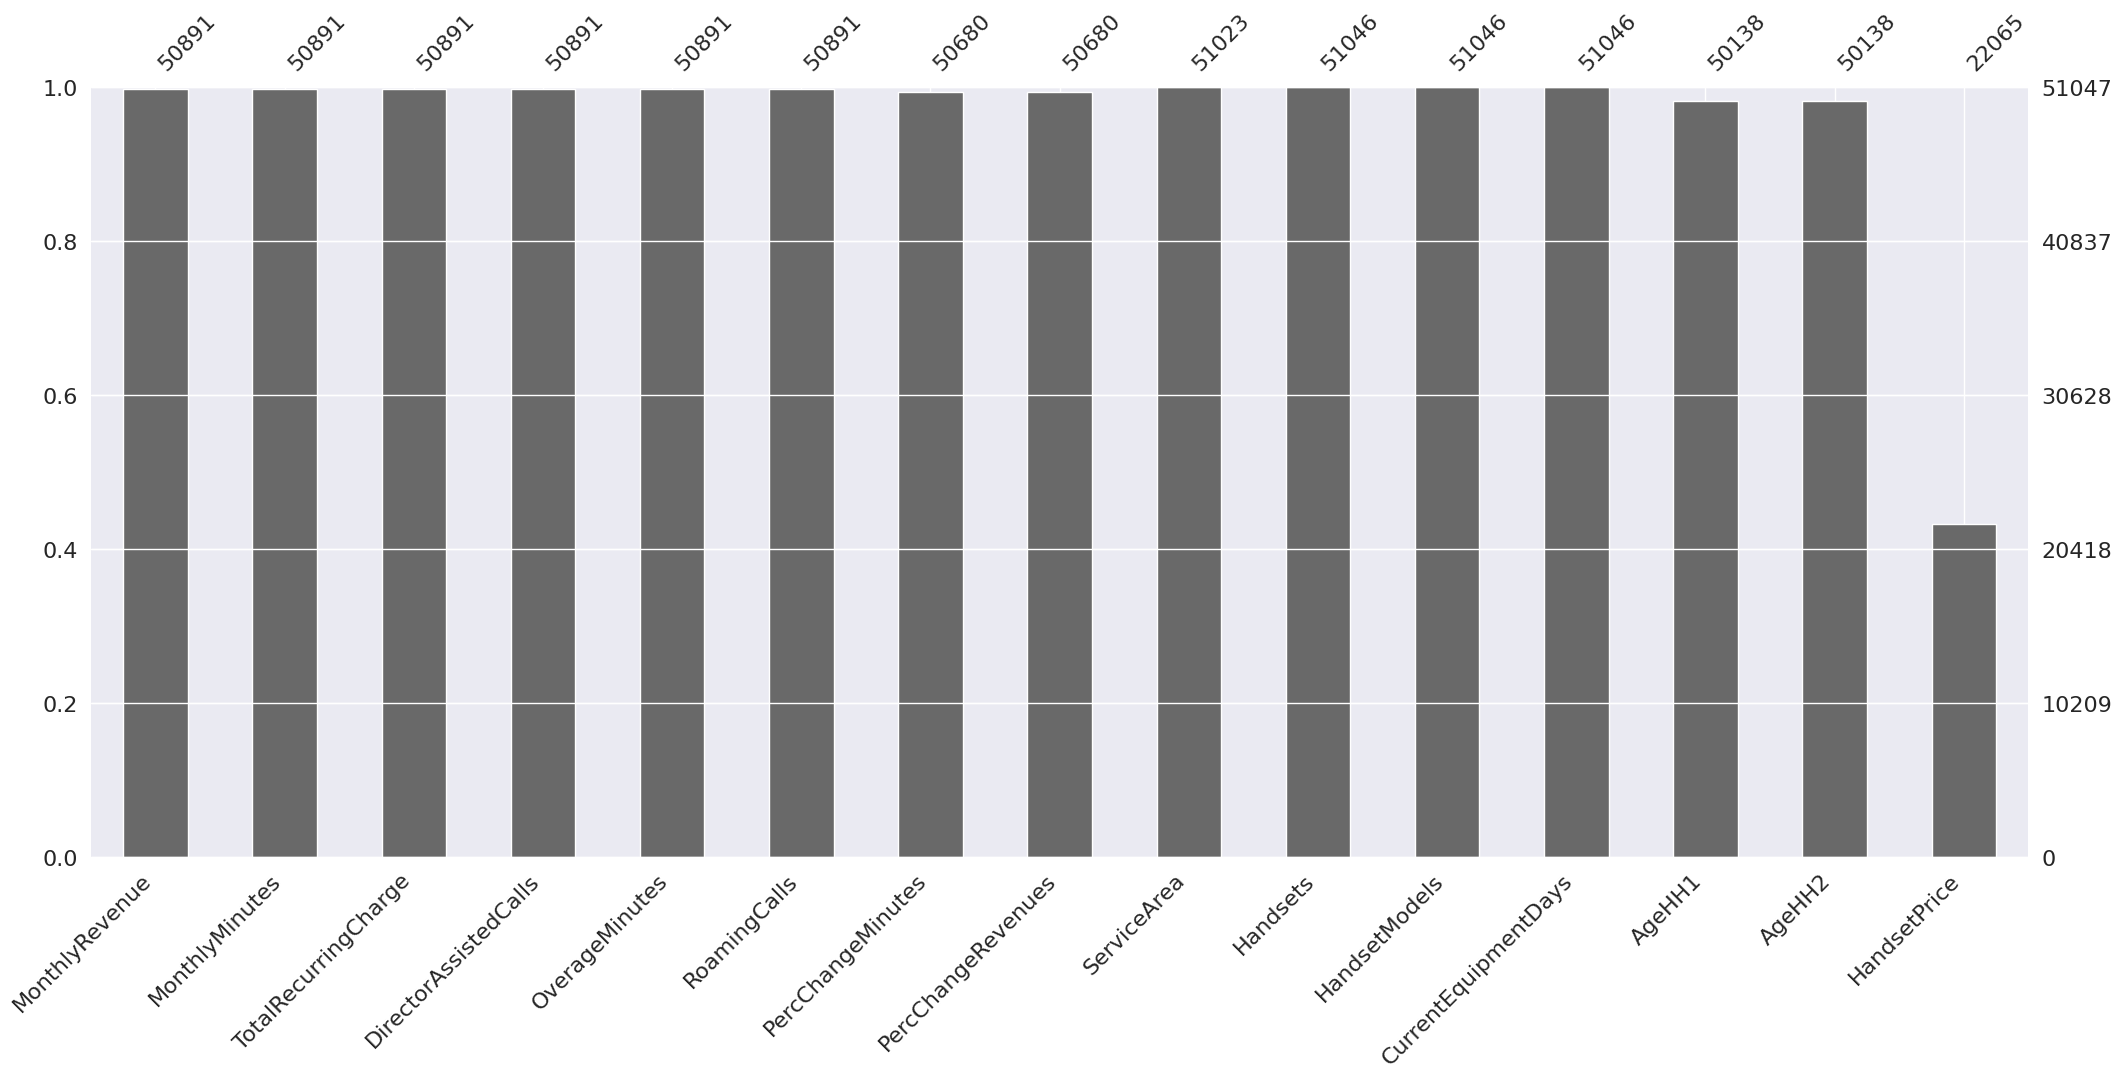

In [30]:
msno.bar(train_missings);

In [31]:
train_missings.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,1.805646,1.558751,380.545841,31.338127,21.144142
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,1.331173,0.905932,253.801982,22.094635,23.931368
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,1.000000,1.000000,-5.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,1.000000,1.000000,205.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,1.000000,1.000000,329.000000,36.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,2.000000,2.000000,515.000000,48.000000,42.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,24.000000,15.000000,1812.000000,99.000000,99.000000


In [32]:
def values_table(train_missings):
        mis_val = train_missings.isnull().sum()
        mis_val_percent = 100 * train_missings.isnull().sum() / len(train_missings)
        mean=train_missings.mean()
        median=train_missings.median()
        total=train_missings.count()
        zeros=train_missings[train_missings==0].count()
        table = pd.concat([ mis_val,mis_val_percent, mean, median, total, zeros], axis=1)
        table = table.rename(columns = {0 :'Train Missing Values', 1 : '% of Train Total Values', 2 : 'Mean'
                                       , 3 : 'Median' , 4 : '# of Values' , 5 : '# of Zeros'})
        table['Data Type'] = train_missings.dtypes
        table = table[table.iloc[:,1] != 0].sort_values('% of Train Total Values', ascending=False).round(1)
        print ("There are " + str(train.shape[1]) + " columns and " + str(train.shape[0]) + " rows in the dataset.\n"
             + str(table.shape[0]) + " of these columns have missing variables.")
        return table

values_table(train_missings)

There are 58 columns and 51047 rows in the dataset.
15 of these columns have missing variables.


,Train Missing Values,% of Train Total Values,Mean,Median,# of Values,# of Zeros,Data Type
HandsetPrice,28982,56.8,NaN,60.0,22065,0,object
AgeHH1,909,1.8,31.3,36.0,50138,13917,float64
AgeHH2,909,1.8,21.1,0.0,50138,26087,float64
PercChangeMinutes,367,0.7,-11.5,-5.0,50680,1124,float64
PercChangeRevenues,367,0.7,-1.2,-0.3,50680,5818,float64
MonthlyRevenue,156,0.3,58.8,48.5,50891,6,float64
MonthlyMinutes,156,0.3,525.7,366.0,50891,723,float64
TotalRecurringCharge,156,0.3,46.8,45.0,50891,160,float64
DirectorAssistedCalls,156,0.3,0.9,0.2,50891,24512,float64
OverageMinutes,156,0.3,40.0,3.0,50891,23262,float64


In [33]:
train_1=train.copy()
test_1=test.copy()

In [34]:
churn=train_1[train_1['Churn']=='Yes']
non_churn= train_1[train_1['Churn']=='No']
churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14503.000000,14503.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14462.000000,14462.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000
mean,57.995041,483.827471,44.529882,0.826793,42.529472,1.404358,-25.458388,-0.497111,5.792638,3.990538,26.495745,1.584597,0.255040,105.000598,23.591720,7.281483,83.947312,61.705717,9.833696,0.010924,1.615335,19.044321,1.598532,1.370811,1.736932,1.501733,421.903881,30.306043,20.445927,0.058392,0.026103,0.046904,4.261845,0.043641,0.227721
std,44.505934,504.634392,22.990134,1.954381,93.172832,11.106095,269.493300,46.652335,8.834394,10.691814,38.813907,4.416373,0.946045,157.854091,33.992748,15.160954,98.218936,86.263566,15.168911,0.447215,4.774239,9.336919,1.852533,0.761329,1.262219,0.863085,259.940076,22.013043,23.536945,0.258222,0.169771,0.240896,3.164527,0.297278,1.318878
min,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-2868.000000,-851.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.520000,132.000000,30.000000,0.000000,0.000000,0.000000,-101.000000,-7.750000,0.700000,0.000000,4.300000,0.000000,0.000000,5.800000,2.300000,0.000000,18.700000,8.700000,1.700000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.520000,330.000000,44.000000,0.250000,4.000000,0.000000,-11.000000,-0.300000,3.000000,1.000000,14.700000,0.000000,0.000000,44.900000,12.000000,1.700000,57.700000,31.300000,5.300000,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000,1.000000,366.000000,34.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,69.950000,667.000000,55.000000,0.740000,46.000000,0.300000,54.000000,1.700000,7.300000,3.300000,34.000000,1.300000,0.300000,140.500000,31.700000,8.000000,114.300000,80.300000,12.150000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,564.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
max,861.110000,5410.000000,338.000000,45.790000,2018.000000,850.900000,5192.000000,2483.500000,208.700000,314.700000,848.700000,172.300000,30.000000,2619.300000,520.300000,298.300000,1359.000000,1313.700000,328.700000,33.700000,135.700000,61.000000,196.000000,53.000000,22.000000,14.000000,1779.000000,98.000000,99.000000,4.000000,3.000000,9.000000,9.000000,9.000000,143.000000


In [35]:
non_churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36177.000000,36177.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36335.000000,36335.000000,36335.000000,35676.000000,35676.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000
mean,59.173538,542.546483,47.759117,0.922870,39.017379,1.168345,-5.971335,-1.470553,6.100094,4.124188,29.014991,1.984142,0.316570,118.767558,26.100793,8.541111,93.222485,70.057714,10.289303,0.012825,1.931666,18.639641,1.505284,1.347672,1.833466,1.581836,363.801156,31.756503,21.427178,0.028622,0.015109,0.054161,4.349901,0.058069,0.157612
std,44.504027,538.816505,24.125276,2.329606,97.916838,9.246760,252.341813,36.349778,9.126058,11.048418,38.878401,5.342580,1.246612,169.697119,35.664862,17.224768,107.437927,95.149817,15.707310,0.644205,5.879328,9.979326,0.843058,0.637329,1.357123,0.921723,249.334338,22.114216,24.083977,0.180685,0.129644,0.330772,3.127216,0.412795,0.486571
min,-6.170000,0.000000,-9.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.100000,170.000000,30.000000,0.000000,0.000000,0.000000,-78.000000,-6.800000,1.000000,0.000000,5.700000,0.000000,0.000000,9.600000,3.700000,0.000000,24.700000,12.000000,2.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,48.815000,381.000000,45.000000,0.250000,2.000000,0.000000,-3.000000,-0.300000,3.000000,1.000000,16.700000,0.000000,0.000000,56.000000,14.000000,2.300000,63.700000,37.700000,5.700000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,310.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,71.617500,743.000000,60.000000,0.990000,39.000000,0.300000,70.000000,1.600000,7.700000,3.700000,37.300000,1.700000,0.300000,158.600000,34.700000,9.700000,124.300000,91.700000,12.700000,0.000000,1.700000,24.000000,2.000000,2.000000,2.000000,2.000000,493.000000,48.000000,44.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,4480.000000,1347.000000,221.700000,384.300000,840.000000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,60.000000,12.000000,11.000000,24.000000,15.000000,1812.000000,99.000000,98.000000,3.000000,3.000000,35.000000,9.000000,25.000000,10.000000


In [36]:
train_1['MonthlyRevenue'].fillna(train_1.groupby('Churn')['MonthlyRevenue'].transform('median'), inplace=True)

In [37]:
test_1['MonthlyRevenue'].fillna(test_1['MonthlyRevenue'].mean(),inplace=True)

In [38]:
#Too many missing variables (56.4%) so we dropped it

train_1.drop('HandsetPrice',axis=1, inplace=True)
test_1.drop('HandsetPrice',axis=1, inplace=True)

In [39]:
train_1.drop('MadeCallToRetentionTeam',axis=1, inplace=True)
test_1.drop('MadeCallToRetentionTeam',axis=1, inplace=True)

In [40]:
train_1.drop('MaritalStatus',axis=1, inplace=True)
test_1.drop('MaritalStatus',axis=1, inplace=True)

In [41]:
train_1.drop('Homeownership',axis=1, inplace=True)
test_1.drop('Homeownership',axis=1, inplace=True)

In [42]:
#Although HandsetModels and Handsets appear numeric, they are categorical variables, so it is more correct to fill them with mode.
train_1[train_1['Handsets'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']]

,HandsetModels,Handsets,CurrentEquipmentDays
38702,NaN,NaN,NaN


In [43]:
print("Handsets:",train_1.Handsets.mode()[0])
print("HandsetModels:",train_1.HandsetModels.mode()[0])
print("CurrentEquipmentDays:",train_1.CurrentEquipmentDays.mode()[0])

Handsets: 1.0
HandsetModels: 1.0
CurrentEquipmentDays: 202.0


In [44]:
train_1['Handsets'].fillna(train_1['Handsets'].mode()[0],inplace=True)

In [45]:
train_1['HandsetModels'].fillna(train_1['HandsetModels'].mode()[0],inplace=True)

In [46]:
train_1['CurrentEquipmentDays'].value_counts()

202.0     159
313.0     156
212.0     149
199.0     147
308.0     147
         ... 
1438.0      1
1381.0      1
1443.0      1
1276.0      1
1219.0      1
Name: CurrentEquipmentDays, Length: 1438, dtype: int64

In [47]:
train_1['CurrentEquipmentDays'].fillna(train_1['CurrentEquipmentDays'].mode()[0],inplace=True)

In [48]:
train_1['ServiceArea'].fillna(train_1['ServiceArea'].mode()[0],inplace=True)
test_1['ServiceArea'].fillna(test_1['ServiceArea'].mode()[0],inplace=True)

In [49]:
train_1['AgeHH1'].fillna(value=0,inplace=True)
test_1['AgeHH1'].fillna(value=0,inplace=True)

In [50]:
train_1['AgeHH2'].fillna(value=0,inplace=True)
test_1['AgeHH2'].fillna(value=0,inplace=True)

In [51]:
display(train_1.groupby(['Churn'],as_index=False)['MonthlyMinutes'].median().style.hide_index())

Churn,MonthlyMinutes
No,381.000000
Yes,330.000000


In [52]:
train_1['MonthlyMinutes'].fillna(train_1.groupby('Churn')['MonthlyMinutes'].transform('median'), inplace=True)

In [53]:
test_1['MonthlyMinutes'].fillna(test_1['MonthlyMinutes'].median(), inplace=True)

In [54]:
train_1['TotalRecurringCharge'].fillna(train_1['TotalRecurringCharge'].median(),inplace=True)
test_1['TotalRecurringCharge'].fillna(test_1['TotalRecurringCharge'].median(),inplace=True)

In [55]:
train_1['PercChangeRevenues'].fillna(train_1['PercChangeRevenues'].median(),inplace=True)
test_1['PercChangeRevenues'].fillna(test_1['PercChangeRevenues'].median(),inplace=True)

In [56]:
train_1['PercChangeMinutes'].fillna(train_1['PercChangeMinutes'].median(),inplace=True)
test_1['PercChangeMinutes'].fillna(train_1['PercChangeMinutes'].median(),inplace=True)

In [57]:
train_1['RoamingCalls'].fillna(value=0,inplace=True)
test_1['RoamingCalls'].fillna(value=0,inplace=True)

In [58]:
train_1['OverageMinutes'].fillna(value=0,inplace=True)
test_1['OverageMinutes'].fillna(value=0,inplace=True)

In [59]:
train_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)
test_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)

In [60]:
train_1.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

# Outliers Detection

In [61]:
print ("There are " + str(train_1.shape[1]) + " columns and  " + str(train_1.shape[0]) + " rows in the train data.\n")
print("There are " + str(test_1.shape[1]) + " columns and " + str(test_1.shape[0]) + " rows in the test data.\n")

There are 54 columns and  51047 rows in the train data.

There are 54 columns and 20000 rows in the test data.



In [74]:
from scipy.stats import zscore
from scipy import stats

train_yeni=train_1.select_dtypes(include=['int', 'float'])
train_yeni.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1,0


In [81]:
import pandas as pd
import numpy as np

# Assuming train_1 is your DataFrame containing the dataset
# Replace train_1 with your actual DataFrame

# Function to calculate outliers using IQR method
def calculate_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Get numerical columns
#train_yeni = train_1.select_dtypes(include=['int', 'float'])

# Calculate outlier count for each column
outlier_counts = train_yeni.apply(calculate_outliers)

# Calculate percentage of outliers for each column
outlier_percentages = outlier_counts.mean() * 100

# Create a DataFrame to store the percentages
outlier_df = pd.DataFrame({'Column': outlier_percentages.index, 'Outlier Percentage': outlier_percentages.values})

# Display the DataFrame
print(outlier_df)


                       Column  Outlier Percentage
0              MonthlyRevenue            5.894568
1              MonthlyMinutes            5.069838
2        TotalRecurringCharge            1.614199
3       DirectorAssistedCalls           10.833154
4              OverageMinutes           11.714694
5                RoamingCalls           19.726918
6           PercChangeMinutes           13.567888
7          PercChangeRevenues           26.389406
8                DroppedCalls            7.271730
9                BlockedCalls           10.807687
10            UnansweredCalls            7.111094
11          CustomerCareCalls           13.166298
12              ThreewayCalls            9.054401
13              ReceivedCalls            7.132642
14              OutboundCalls            6.546908
15               InboundCalls            9.742002
16             PeakCallsInOut            5.491018
17          OffPeakCallsInOut            7.099340
18        DroppedBlockedCalls            7.710541


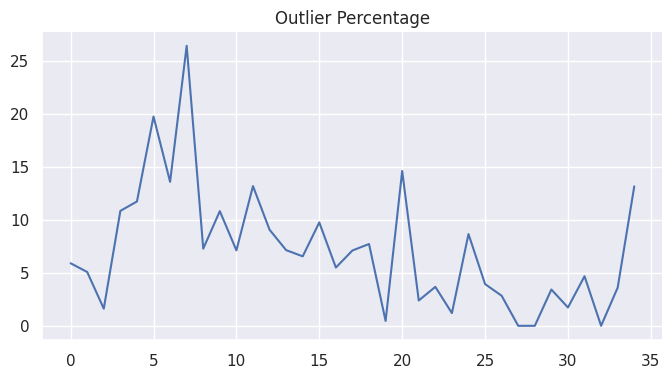

In [80]:
# @title Outlier Percentage

from matplotlib import pyplot as plt
outlier_df['Outlier Percentage'].plot(kind='line', figsize=(8, 4), title='Outlier Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Column', ylabel='Outlier Percentage'>

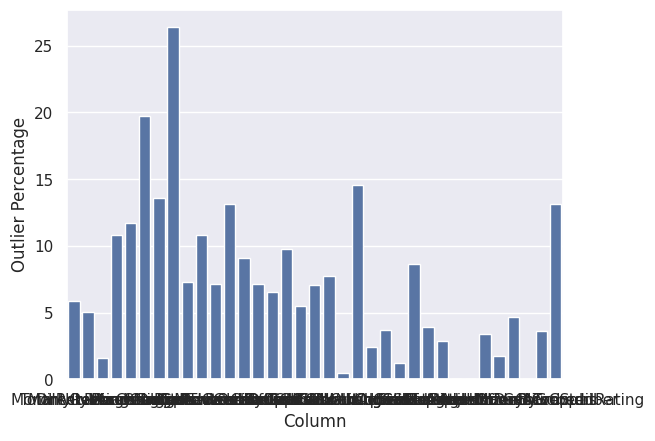

In [79]:
# title Outlier Percentage by Column

sns.barplot(x="Column", y="Outlier Percentage", data=outlier_df)

In [85]:
from scipy.stats import zscore

# Calculate Z-score for each column
zscore_df = train_yeni.apply(zscore)

# Create a DataFrame to store the Z-scores
zscore_df = pd.DataFrame(zscore_df, columns=train_yeni.columns)

# Display the DataFrame
zscore_df


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
0,-0.783078,-0.578566,-1.042504,-0.288675,-0.413679,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,-0.565621,-0.366752,-0.255797,-0.105716,-0.720778,-0.490714,-0.310154,-0.470619,-0.569459,-0.020663,-0.275825,4.310567,0.382421,-0.524583,0.146016,0.487086,-0.077000,1.400902,-0.869616,4.662897,-0.128300,-0.169283,-0.103411,-0.140707,1.003878
1,-0.940809,-0.973548,-1.252478,-0.401001,-0.413679,-0.125718,0.029233,0.030066,-0.631532,-0.373230,-0.658224,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.815173,-0.718593,-0.633746,-0.020663,-0.329540,4.004446,-0.434992,-0.524583,0.146016,-0.616767,4.426578,0.413717,0.889077,-0.180167,-0.128300,-0.169283,0.215243,-0.140707,-0.217112
2,-0.468065,-0.977328,-0.370584,-0.401001,-0.413679,-0.125718,0.037028,0.030066,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.687153,-0.712257,-0.490714,-0.850429,-0.689483,-0.653032,-0.020663,-0.329540,4.208527,-0.434992,-0.524583,-0.605213,-0.616767,5.640140,-0.214492,0.219099,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.217112
3,0.528273,1.487057,1.183229,0.156136,-0.413679,-0.125718,0.656704,0.235483,5.085049,0.330172,1.227267,0.477033,0.856964,0.513561,9.796479,8.329790,4.432265,2.544956,3.184929,-0.020663,3.734865,4.106486,0.382421,0.955867,5.404621,2.694792,0.305194,-0.035004,-0.869616,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.217112
4,-0.937434,-0.992446,-1.252478,-0.401001,-0.413679,-0.125718,0.044823,0.024994,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.862816,-0.729374,-0.653032,-0.020663,-0.329540,3.494244,0.382421,0.955867,1.648475,1.590939,1.857608,0.682949,1.391560,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-0.217112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,-0.253857,-0.368791,-0.076620,-0.401001,-0.413679,-0.125718,0.025336,0.022458,0.363618,-0.126582,0.514742,-0.366752,-0.255797,-0.335768,-0.237944,-0.412710,0.664629,-0.370352,0.118417,-0.020663,-0.275825,1.045275,-0.434992,-0.524583,0.146016,0.487086,0.573123,1.670135,1.810297,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.217112
51043,0.818310,2.305368,1.603179,0.043810,0.052812,0.353707,0.520298,0.433291,1.181852,-0.309284,0.334682,-0.366752,-0.255797,3.403925,1.826881,1.507400,2.173971,1.947663,0.459141,-0.020663,2.230856,1.045275,-0.434992,-0.524583,0.146016,0.487086,0.328835,0.772693,1.140318,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-0.217112
51044,-0.253857,-0.368791,-0.076620,-0.401001,-0.413679,-0.125718,0.025336,0.022458,7.263321,0.019579,6.654807,-0.111654,11.470994,6.670299,11.500598,4.771586,12.086646,9.084991,4.232815,-0.020663,0.870086,0.637113,-0.434992,-0.524583,0.897246,0.487086,-0.010017,0.234228,-0.869616,-0.180167,-0.128300,-0.169283,0.852549,2.469282,-0.217112
51045,-0.224718,-0.272408,-0.076620,-0.401001,-0.413679,-0.125718,0.025336,0.022458,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.862816,-0.729374,-0.653032,-0.020663,-0.329540,1.249356,-0.434992,-0.524583,0.146016,0.487086,0.206690,0.054740,-0.869616,-0.180167,-0.128300,-0.169283,1.489856,-0.140707,-0.217112


In [93]:
# Assuming zscore_df is your DataFrame containing the Z-scores for each value
# Replace zscore_df with your actual DataFrame

# Filter zscore_df to show only absolute values greater than 3
zscore_refine = zscore_df[abs(zscore_df) > 3]

# Display the refined DataFrame
print(zscore_refine)


       MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0                 NaN             NaN                   NaN   
1                 NaN             NaN                   NaN   
2                 NaN             NaN                   NaN   
3                 NaN             NaN                   NaN   
4                 NaN             NaN                   NaN   
...               ...             ...                   ...   
51042             NaN             NaN                   NaN   
51043             NaN             NaN                   NaN   
51044             NaN             NaN                   NaN   
51045             NaN             NaN                   NaN   
51046             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                        NaN             NaN           NaN                NaN   
1                        NaN             NaN           NaN                NaN   


In [87]:
import pandas as pd
from scipy.stats import zscore

z_scores = train_yeni.apply(zscore)
outlier_rows = (z_scores.abs() > 3).any(axis=1)
train_yeni_cleaned = train_yeni[~outlier_rows]
print(train_yeni_cleaned)


       MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
148            83.500          1130.0                  75.0   
156            35.300           307.0                  35.0   
167            32.020           362.0                  32.0   
175            38.170           214.0                  30.0   
179            51.720           764.0                  70.0   
...               ...             ...                   ...   
51039          50.000           492.0                  50.0   
51040          71.990           724.0                  70.0   
51041         117.490           384.0                  30.0   
51042          47.520           330.0                  45.0   
51045          48.815           381.0                  45.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
148                     0.00            30.0           0.3               90.0   
156                     0.00             0.0           0.0              204.0   


In [88]:
# Calculate Z-score for each column in the cleaned dataset
z_scores_cleaned = train_yeni_cleaned.apply(zscore)

# Check if any absolute Z-score is greater than 3 for each column
any_outliers_columnwise = (z_scores_cleaned.abs() > 3).any()

print("Outliers present column-wise:")
print(any_outliers_columnwise)


Outliers present column-wise:
MonthlyRevenue                True
MonthlyMinutes                True
TotalRecurringCharge          True
DirectorAssistedCalls         True
OverageMinutes                True
RoamingCalls                  True
PercChangeMinutes             True
PercChangeRevenues            True
DroppedCalls                  True
BlockedCalls                  True
UnansweredCalls               True
CustomerCareCalls             True
ThreewayCalls                 True
ReceivedCalls                 True
OutboundCalls                 True
InboundCalls                  True
PeakCallsInOut                True
OffPeakCallsInOut             True
DroppedBlockedCalls           True
CallForwardingCalls           True
CallWaitingCalls              True
MonthsInService               True
UniqueSubs                    True
ActiveSubs                    True
Handsets                      True
HandsetModels                 True
CurrentEquipmentDays          True
AgeHH1                   

In [90]:
train_yeni_cleaned.describe()


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,38448.000000,38448.00000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.000000,38448.0,38448.0,38448.0,38448.000000,38448.000000,38448.000000
mean,49.422228,392.39859,43.450765,0.598242,24.112698,0.735099,-6.339524,-0.992353,4.255145,2.533679,20.261930,1.113033,0.162505,77.153628,17.997521,5.154513,66.744923,46.747126,6.823663,0.001483,0.864175,18.000208,1.476592,1.331461,1.572956,1.411075,394.117743,31.497607,21.421608,0.0,0.0,0.0,4.428917,0.021952,0.145131
std,25.645081,338.48367,19.068136,1.105899,46.770779,2.487417,164.421353,21.622143,5.234067,4.582700,22.364806,2.416446,0.416308,99.361944,21.313132,8.554858,62.750916,53.596165,7.568874,0.033612,1.784060,8.685034,0.709850,0.546624,0.879823,0.669478,237.295070,22.170275,23.960253,0.0,0.0,0.0,3.118679,0.146528,0.414079
min,-6.170000,0.00000,-11.000000,0.000000,0.000000,0.000000,-781.000000,-118.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-4.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,32.380000,135.00000,30.000000,0.000000,0.000000,0.000000,-69.000000,-5.100000,0.700000,0.000000,4.300000,0.000000,0.000000,5.300000,2.300000,0.000000,18.700000,8.700000,1.300000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,223.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000
50%,43.400000,306.00000,45.000000,0.000000,0.000000,0.000000,-5.000000,-0.300000,2.300000,0.700000,13.300000,0.000000,0.000000,38.100000,10.700000,1.300000,51.700000,28.000000,4.300000,0.000000,0.000000,16.000000,1.000000,1.000000,1.000000,1.000000,348.000000,36.000000,0.000000,0.0,0.0,0.0,5.000000,0.000000,0.000000
75%,60.590000,558.00000,52.000000,0.740000,27.000000,0.200000,55.000000,1.100000,6.000000,2.700000,28.700000,1.000000,0.000000,111.000000,26.000000,6.300000,96.700000,65.300000,9.300000,0.000000,1.000000,24.000000,2.000000,2.000000,2.000000,2.000000,540.000000,48.000000,44.000000,0.0,0.0,0.0,7.000000,0.000000,0.000000
max,191.840000,2110.00000,118.000000,7.420000,329.000000,30.600000,753.000000,116.900000,33.000000,36.700000,144.700000,17.000000,3.700000,612.900000,130.700000,58.000000,402.700000,344.700000,56.700000,1.700000,18.300000,48.000000,5.000000,3.000000,5.000000,4.000000,1141.000000,96.000000,92.000000,0.0,0.0,0.0,9.000000,1.000000,2.000000


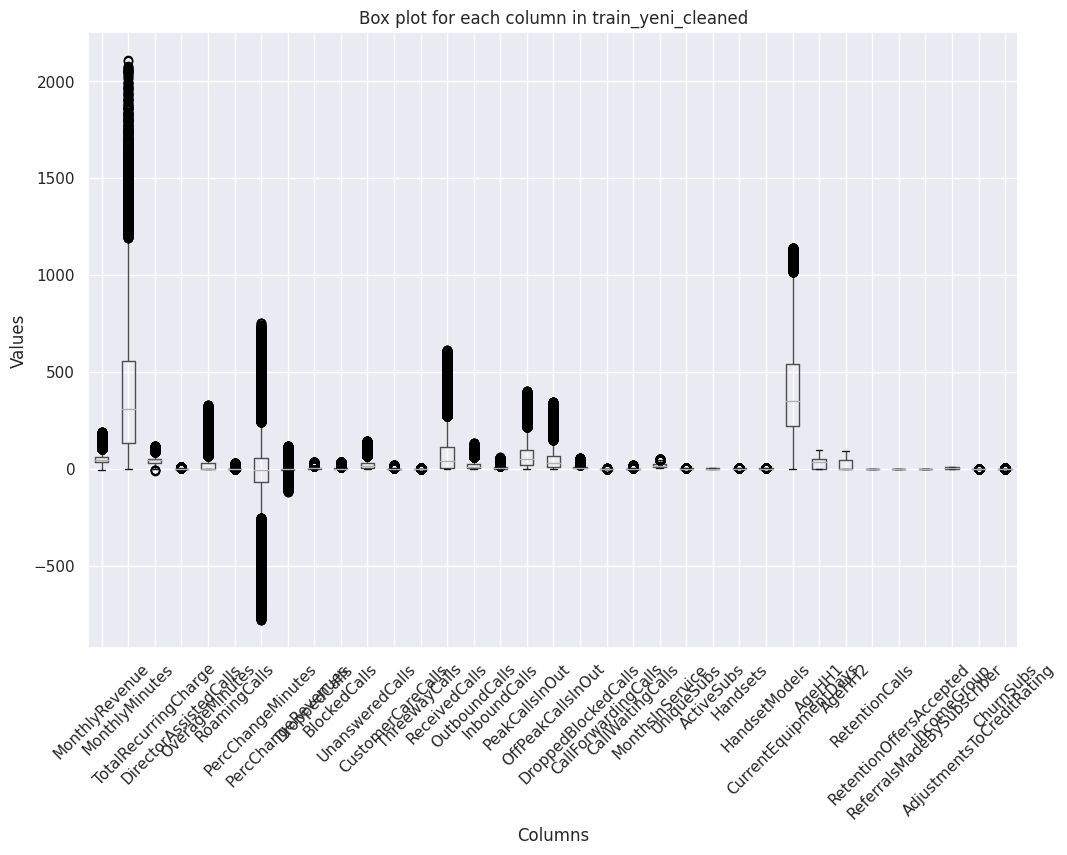

In [92]:
train_yeni_cleaned.boxplot(figsize=(12, 8))
plt.title('Box plot for each column in train_yeni_cleaned')
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [94]:
monthly_minutes_nan = zscore_refine['MonthlyMinutes'].isnull()

# Filter zscore_refine to exclude rows where "MonthlyMinutes" column has NaN values
zscore_refine_cleaned = zscore_refine[~monthly_minutes_nan]
print(zscore_refine_cleaned)


       MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
41                NaN        3.509212              4.332851   
50           3.104174        5.582394                   NaN   
67           3.762100        3.426058                   NaN   
74                NaN        3.271089                   NaN   
77           5.007074        6.204160              5.718685   
...               ...             ...                   ...   
50731             NaN        3.110451                   NaN   
50799             NaN        4.943620              4.752801   
50817        3.911956        5.357501              4.752801   
50983       10.713297        7.925827                   NaN   
51003             NaN        3.613155                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
41                       NaN             NaN           NaN                NaN   
50                       NaN        8.625894           NaN                NaN   


In [77]:
outliers_zscore=pd.DataFrame(outlier_percentages.items(),columns=['Feature','Outliers'])
outliers_zscore

,Feature,Outliers
0,MonthlyRevenue,5.894568
1,MonthlyMinutes,5.069838
2,TotalRecurringCharge,1.614199
3,DirectorAssistedCalls,10.833154
4,OverageMinutes,11.714694
5,RoamingCalls,19.726918
6,PercChangeMinutes,13.567888
7,PercChangeRevenues,26.389406
8,DroppedCalls,7.271730
9,BlockedCalls,10.807687


In [ ]:
import pandas as pd
from scipy.stats import zscore

def remove_outliers_zscore(df):
    train_new = df.copy()
    outliers = {}

    for col in df:
        z_score = zscore(df[col])
        upper_replace_value = df[z_score <= 3][col].max()
        lower_replace_value = df[z_score >= -3][col].min()

        outliers[col] = len(train_new[col][(train_new[col] > upper_replace_value) | (train_new[col] < lower_replace_value)])

        train_new[col] = df[col][(z_score > -3) & (z_score < 3)]  # Removing outliers

    return train_new, outliers

train_yeni_cleaned, outliers_zscore = remove_outliers_zscore(train_yeni)

print("DataFrame after removing outliers:")
print(train_yeni_cleaned)

outliers_zscore_df = pd.DataFrame(outliers_zscore.items(), columns=['Feature', 'Outliers'])



In [ ]:
train_yeni_cleaned.shape

(51047, 35)

In [ ]:
train_new1 = train_yeni.copy()
outliers_1={}
for col in train_yeni:
    q1 = train_yeni[col].quantile(q=0.15)
    q3 = train_yeni[col].quantile(q=0.85)
    iqr = stats.iqr(train_yeni[col])
    train_new1 = train_yeni.copy()
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    outliers_1[col] = len(train_new1[col][(train_new1[col] > upper_limit)| (train_new1[col] < lower_limit)])

In [ ]:
outliers_iqr=pd.DataFrame(outliers_1.items(),columns=['Feature','Outliers'])
outliers_iqr

,Feature,Outliers
0,MonthlyRevenue,2157
1,MonthlyMinutes,1553
2,TotalRecurringCharge,560
3,DirectorAssistedCalls,3920
4,OverageMinutes,4000
5,RoamingCalls,6659
6,PercChangeMinutes,4947
7,PercChangeRevenues,9679
8,DroppedCalls,2524
9,BlockedCalls,3966


In [ ]:
outliers_hard=pd.DataFrame(outliers_2.items(),columns=['Feature','Outliers'])
outliers_hard

,Feature,Outliers
0,MonthlyRevenue,935
1,MonthlyMinutes,511
2,TotalRecurringCharge,975
3,DirectorAssistedCalls,490
4,OverageMinutes,511
5,RoamingCalls,510
6,PercChangeMinutes,1021
7,PercChangeRevenues,1022
8,DroppedCalls,493
9,BlockedCalls,510


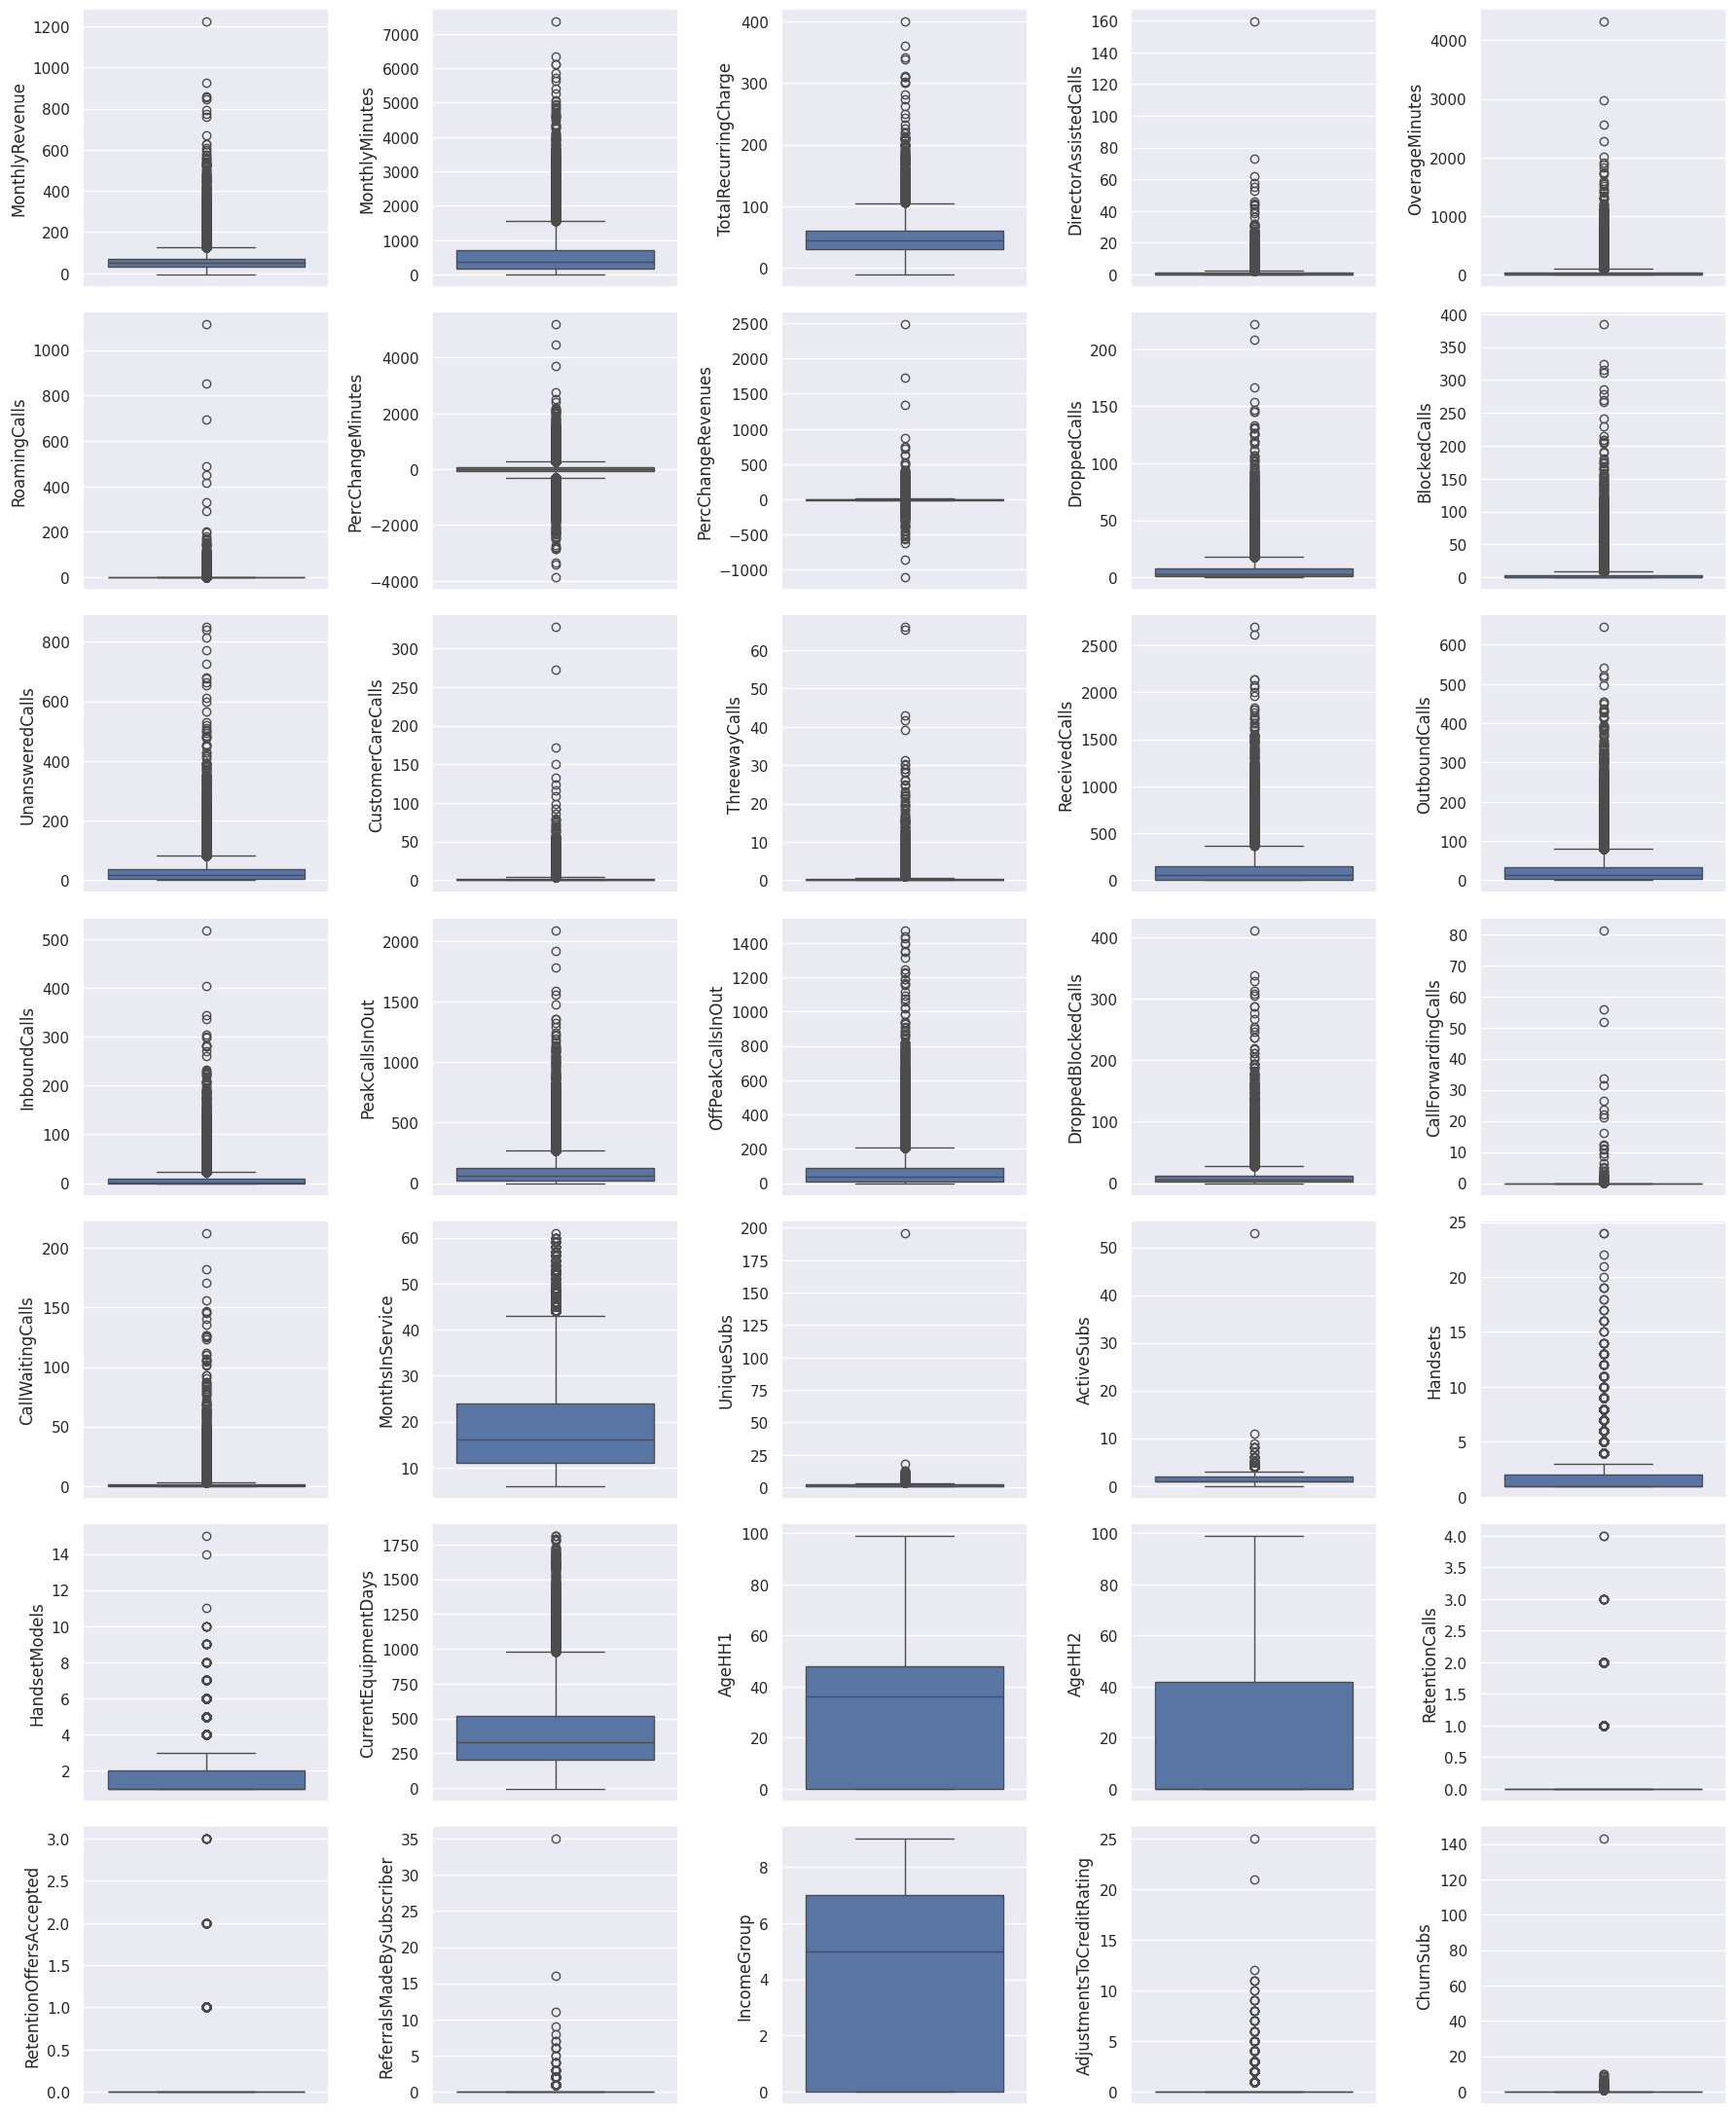

In [ ]:
plt.figure(figsize=(18,25))
for num,col in enumerate(train_yeni.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(8, 5, num)
    sns.boxplot(train_yeni[col])
    plt.tight_layout()

# **Label Encoding**

In [ ]:
train_df=train_1.copy()
for i in train_df.columns:
      if train_df[i].dtype=='object':
            print(pd.DataFrame(train_df[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1708
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
OHIRAV330            1
OMANEW515            1
KCYHES316            1
AIRGEO843            1
NCRDNN910            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     HasCreditCard
Yes          34503
No           16544
     NewCellphoneUs

In [ ]:
train_1.drop('ServiceArea',axis=1, inplace=True)
test_1.drop('ServiceArea',axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
def FunLabelEncoder(train_df):
    for c in train_df.columns:
        if train_df.dtypes[c] == object:
            enc.fit(train_df[c].astype(str))
            train_df[c] = enc.transform(train_df[c].astype(str))
    return train_df

In [ ]:
train_df = FunLabelEncoder(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  int64  
 1   MonthlyRevenue             51047 non-null  float64
 2   MonthlyMinutes             51047 non-null  float64
 3   TotalRecurringCharge       51047 non-null  float64
 4   DirectorAssistedCalls      51047 non-null  float64
 5   OverageMinutes             51047 non-null  float64
 6   RoamingCalls               51047 non-null  float64
 7   PercChangeMinutes          51047 non-null  float64
 8   PercChangeRevenues         51047 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

In [ ]:
train_df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,ChurnSubs
0,1,24.000,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,658,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,4,0,0,0,2,4,1
1,1,16.990,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,610,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,5,0,0,3,2,4,0
2,0,38.000,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,352,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,2,3,1,0
3,0,82.280,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,610,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,6,0,0,3,0,3,0
4,1,17.140,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,563,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,9,0,1,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,47.520,330.0,45.0,0.00,0.0,0.0,-5.0,-0.3,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,310,2.0,2.0,526.0,68.0,64.0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,6,0,0,0,2,3,0
51043,0,95.170,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,288,2.0,2.0,464.0,48.0,48.0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,9,0,1,2,0,3,0
51044,1,47.520,330.0,45.0,0.00,0.0,0.0,-5.0,-0.3,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,288,3.0,2.0,378.0,36.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0,1,4,0,0,0
51045,0,48.815,381.0,45.0,0.00,0.0,0.0,-5.0,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,411,2.0,2.0,433.0,32.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,4,0,3,0


In [ ]:
test_df=test_1.copy()
enc = LabelEncoder()
def FunLabelEncoder(tes_df):
    for c in test_df.columns:
        if test_df.dtypes[c] == object:
            enc.fit(test_df[c].astype(str))
            test_df[c] = enc.transform(test_df[c].astype(str))
    return test_df

In [ ]:
test_df = FunLabelEncoder(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             20000 non-null  float64
 3   MonthlyMinutes             20000 non-null  float64
 4   TotalRecurringCharge       20000 non-null  float64
 5   DirectorAssistedCalls      20000 non-null  float64
 6   OverageMinutes             20000 non-null  float64
 7   RoamingCalls               20000 non-null  float64
 8   PercChangeMinutes          20000 non-null  float64
 9   PercChangeRevenues         20000 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

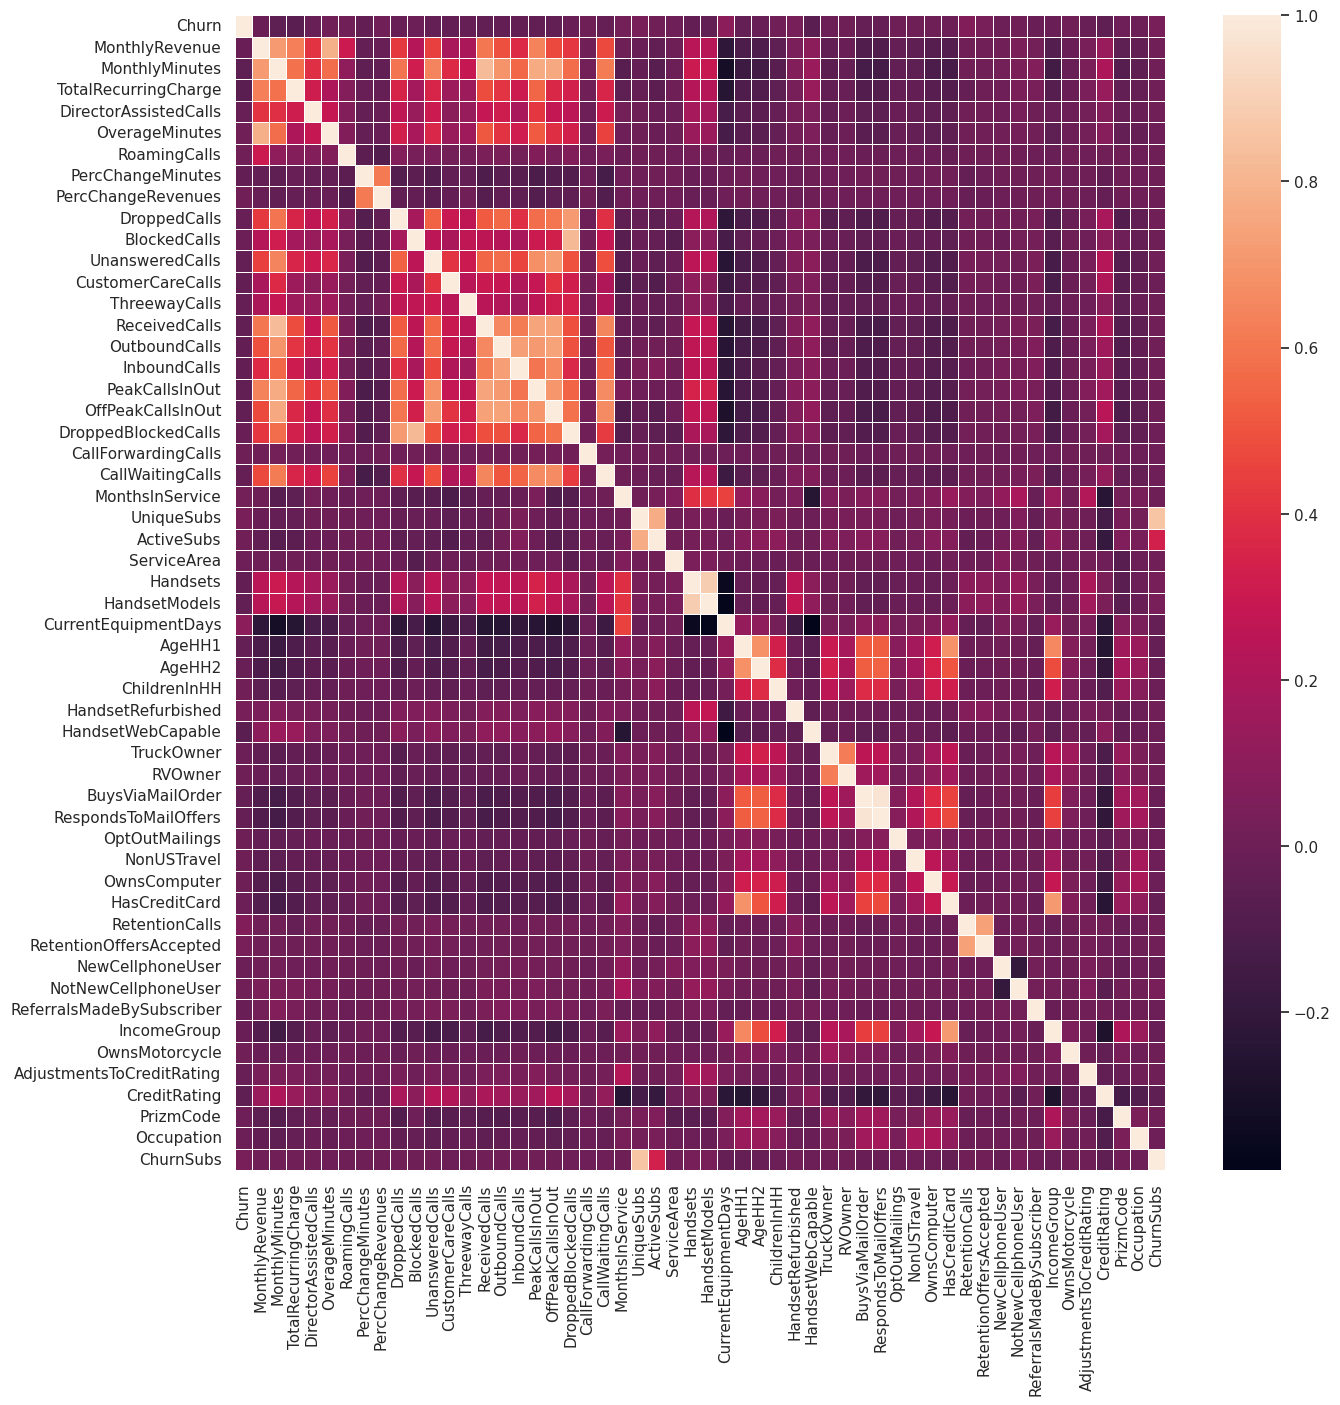

In [ ]:
cor = train_df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cor, fmt=".4f", linewidths=0.5, ax=ax);

## Feature Scaling






In [ ]:
y = train_df['Churn']
X= train_df.drop(columns=['Churn'],axis=1)

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,ChurnSubs
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,658,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,4,0,0,0,2,4,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,610,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,5,0,0,3,2,4,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,352,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,2,3,1,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,610,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,6,0,0,3,0,3,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,563,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,9,0,1,0,0,4,0


In [ ]:
y

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int64

# Imbalanced dataset


In [ ]:
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X.shape

(72672, 53)

In [ ]:
y.shape

(72672,)

# Train/Test Split,Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9,stratify=y)

columns = X_train.columns

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# Classification Algorithms and Optimization

In [ ]:
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

**Model 1 : LR**

In [ ]:
def run_exps(X_train, y_train, X_test, y_test):

  models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('GaussianNB', GaussianNB()),
          ('XGB', XGBClassifier()),
          ('AdaBoost',AdaBoostClassifier()),
          ('GradiendtBoost',GradientBoostingClassifier()),
           ('LightGB',lgb.LGBMClassifier())
        ]

  for name, model in models:

    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf = confusion_matrix(y_test, y_pred)
    print(name)
    sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    print(classification_report(y_test, y_pred))

LogReg


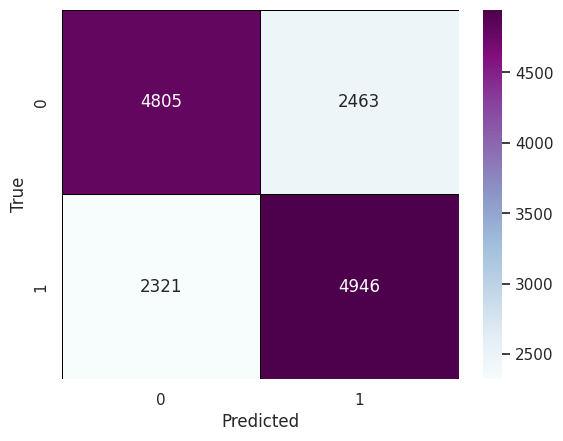

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      7268
           1       0.67      0.68      0.67      7267

    accuracy                           0.67     14535
   macro avg       0.67      0.67      0.67     14535
weighted avg       0.67      0.67      0.67     14535

RF


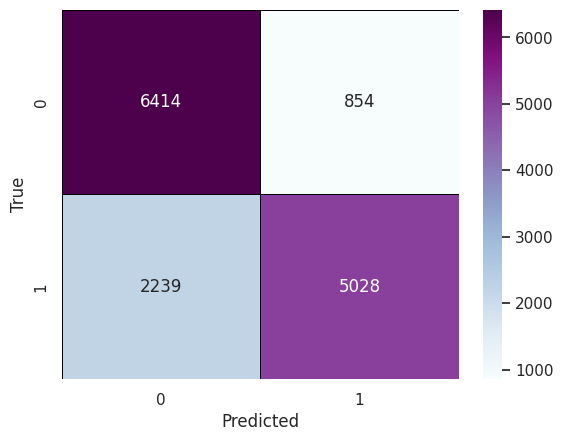

              precision    recall  f1-score   support

           0       0.74      0.88      0.81      7268
           1       0.85      0.69      0.76      7267

    accuracy                           0.79     14535
   macro avg       0.80      0.79      0.79     14535
weighted avg       0.80      0.79      0.79     14535

KNN


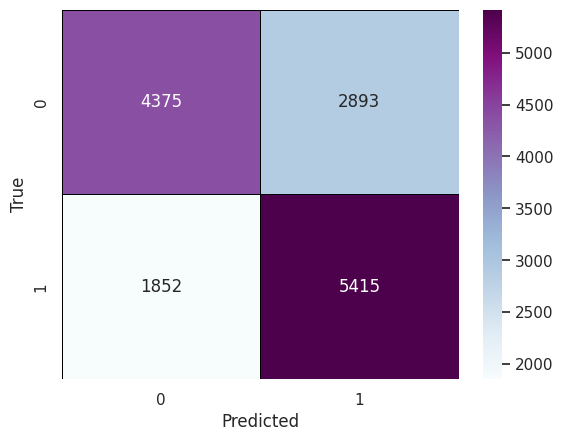

              precision    recall  f1-score   support

           0       0.70      0.60      0.65      7268
           1       0.65      0.75      0.70      7267

    accuracy                           0.67     14535
   macro avg       0.68      0.67      0.67     14535
weighted avg       0.68      0.67      0.67     14535

GaussianNB


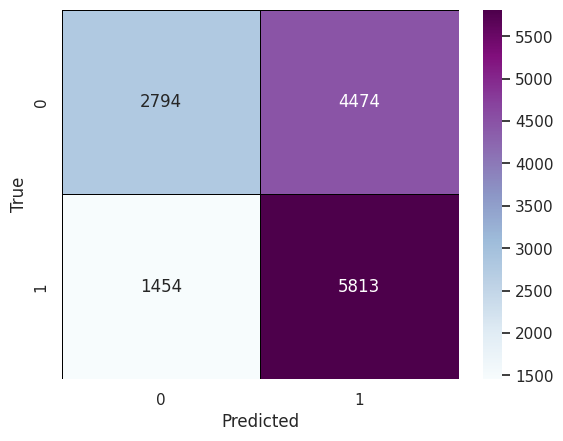

              precision    recall  f1-score   support

           0       0.66      0.38      0.49      7268
           1       0.57      0.80      0.66      7267

    accuracy                           0.59     14535
   macro avg       0.61      0.59      0.57     14535
weighted avg       0.61      0.59      0.57     14535

XGB


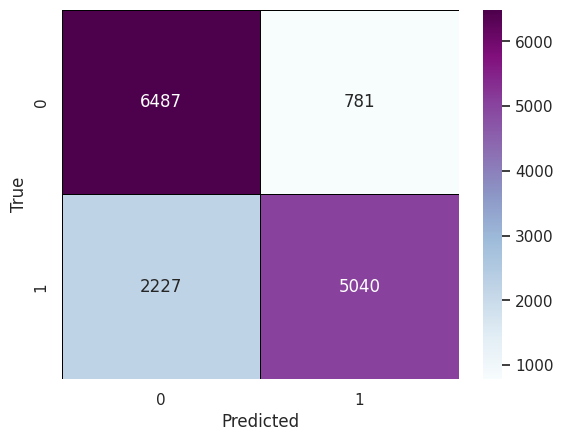

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      7268
           1       0.87      0.69      0.77      7267

    accuracy                           0.79     14535
   macro avg       0.81      0.79      0.79     14535
weighted avg       0.81      0.79      0.79     14535

AdaBoost


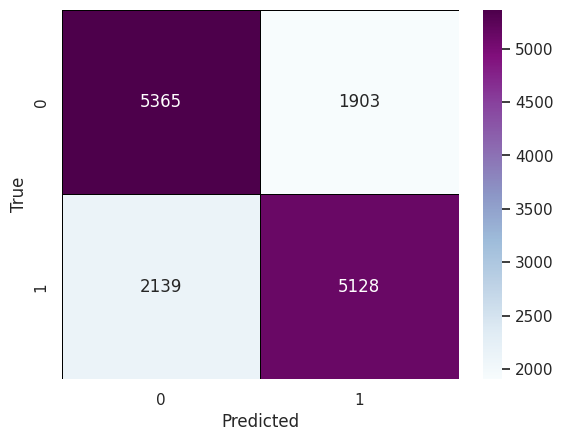

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      7268
           1       0.73      0.71      0.72      7267

    accuracy                           0.72     14535
   macro avg       0.72      0.72      0.72     14535
weighted avg       0.72      0.72      0.72     14535

GradiendtBoost


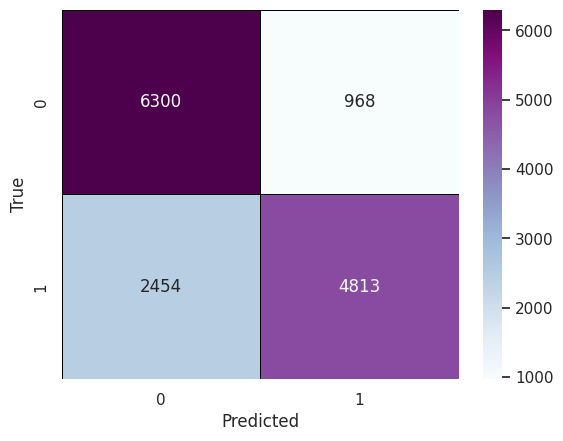

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      7268
           1       0.83      0.66      0.74      7267

    accuracy                           0.76     14535
   macro avg       0.78      0.76      0.76     14535
weighted avg       0.78      0.76      0.76     14535

[LightGBM] [Info] Number of positive: 29069, number of negative: 29068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6891
[LightGBM] [Info] Number of data points in the train set: 58137, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000034
[LightGBM] [Info] Start training from score 0.000034
LightGB


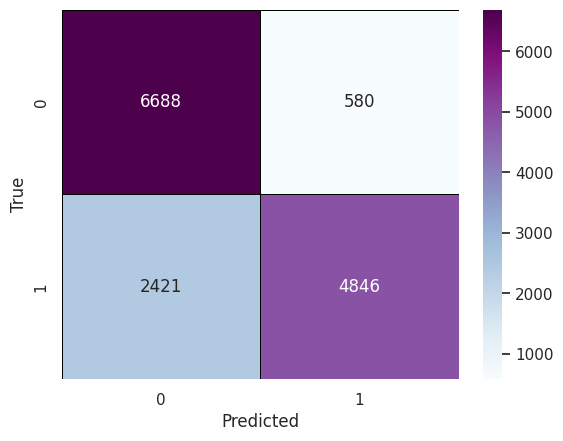

              precision    recall  f1-score   support

           0       0.73      0.92      0.82      7268
           1       0.89      0.67      0.76      7267

    accuracy                           0.79     14535
   macro avg       0.81      0.79      0.79     14535
weighted avg       0.81      0.79      0.79     14535



In [ ]:
run_exps(X_train, y_train, X_test, y_test)

## **Super Learner**

In [ ]:
pip install mlens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
from mlens.ensemble import SuperLearner

In [ ]:
SL = SuperLearner(folds=5, random_state=42)

In [ ]:
|SL.add([RF, XG, ET])

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [ ]:
SL.add_meta(MLPClassifier())

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [ ]:
cross_val_SL_Acc = cross_val_score(SL, X_train, y_train, cv = CV, scoring = 'accuracy')
cross_val_SL_f1 = cross_val_score(SL, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_SL_AUC = cross_val_score(SL, X_train, y_train, cv = CV, scoring = 'roc_auc')

In [ ]:
LogisticRegression()

LogisticRegression()

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      7268
           1       0.67      0.68      0.67      7267

    accuracy                           0.67     14535
   macro avg       0.67      0.67      0.67     14535
weighted avg       0.67      0.67      0.67     14535



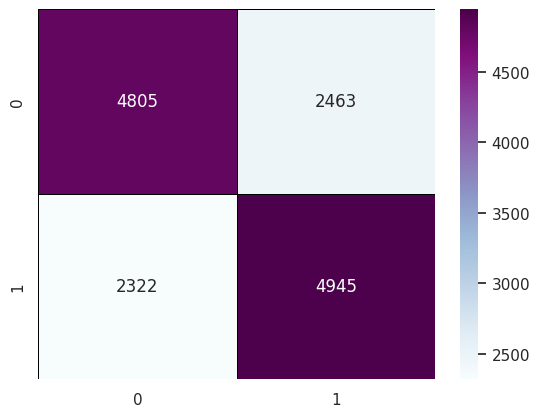

In [ ]:
class_weight= {0: 0.65, 1: 1.7}
log=LogisticRegression(class_weight='balanced',penalty='l2',max_iter=150)
clf_log=log.fit(X_train, y_train)
y_pred= clf_log.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True,linewidth=0.7,linecolor='black',fmt='g',cmap="BuPu")
print(classification_report(y_test, y_pred))


Logistic: f1=0.674 auc=0.746


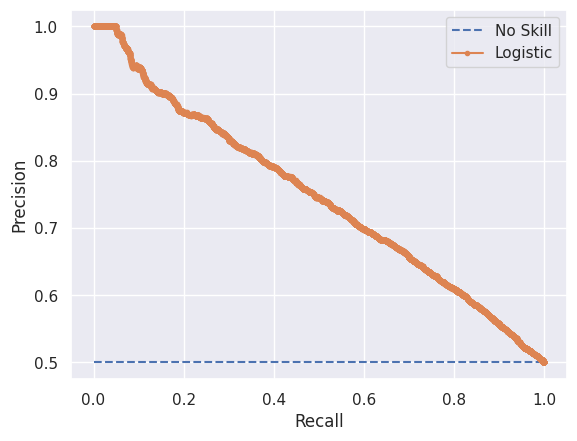

In [ ]:
clf_log=log.fit(X_train, y_train)
lr_probs =clf_log.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
y_pred= clf_log.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

pyplot.legend()

pyplot.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred1= clf_log.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.7299401157470397


In [ ]:
a=len(train_df)/2
a/len(non_churn),a/len(churn)

(0.7024300968736239, 1.7349942220107402)

In [ ]:
#Hyperparameter Tuning

logreg_param = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=250)
gsearch_log = GridSearchCV(estimator = LogisticRegression(class_weight='balanced',max_iter=150),
                           param_grid = logreg_param,
                           scoring='roc_auc',
                           verbose=3,
                           cv=skf)

grid_log=gsearch_log.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.725 total time=   0.2s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.720 total time=   0.2s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.732 total time=   0.2s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.728 total time=   0.2s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.724 total time=   0.3s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l

In [ ]:
print("Best: %f using %s" % (grid_log.best_score_, grid_log.best_params_))

means = grid_log.cv_results_['mean_test_score']
stds = grid_log.cv_results_['std_test_score']
params = grid_log.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.731602 using {'C': 100.0, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.726042 (0.003936) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.730362 (0.004243) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.731600 (0.004298) with: {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 1.0, 'penalty': 'l1'}
0.731599 (0.004297) with: {'C': 1.0, 'penalty': 'l2'}
nan (nan) with: {'C': 10.0, 'penalty': 'l1'}
0.731598 (0.004295) with: {'C': 10.0, 'penalty': 'l2'}
nan (nan) with: {'C': 100.0, 'penalty': 'l1'}
0.731602 (0.004290) with: {'C': 100.0, 'penalty': 'l2'}
nan (nan) with: {'C': 1000.0, 'penalty': 'l1'}
0.731599 (0.004295) with: {'C': 1000.0, 'penalty': 'l2'}


## Random Forest

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      7268
           1       0.85      0.69      0.76      7267

    accuracy                           0.78     14535
   macro avg       0.79      0.78      0.78     14535
weighted avg       0.79      0.78      0.78     14535



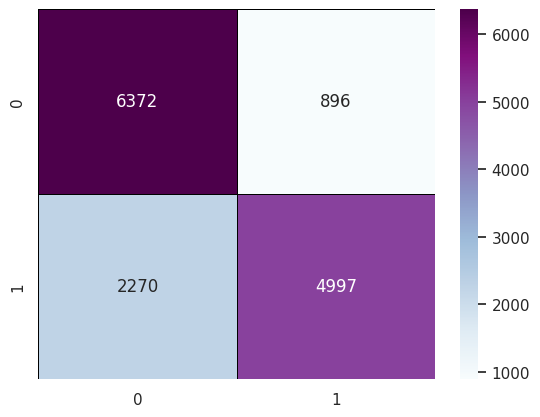

In [ ]:
rf_param = {"max_features": [1,10],
                "min_samples_split":[2,10],
                "min_samples_leaf":[1,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                }
rf=RandomForestClassifier(class_weight='balanced',max_features=3,min_samples_split=3,min_samples_leaf=3,bootstrap=False)
clf_rf=rf.fit(X_train, y_train)
y_pred= clf_rf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred1= clf_rf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.8575878177289711


In [ ]:
rf_param = {"max_features": [1,10],
                "min_samples_split":[2,10],
                "min_samples_leaf":[1,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                }
# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=250)
# Initialize GridSearchCV for Random Forest
gsearch_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                          param_grid=rf_param,
                          scoring='roc_auc',
                          verbose=3,
                          cv=skf)
# Fit the GridSearchCV instance to the data
grid_rf = gsearch_rf.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END bootstrap=False, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.865 total time=  10.7s
[CV 2/5] END bootstrap=False, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.852 total time=  10.0s
[CV 3/5] END bootstrap=False, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.865 total time=   9.4s
[CV 4/5] END bootstrap=False, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.862 total time=   9.6s
[CV 5/5] END bootstrap=False, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.865 total time=  10.0s
[CV 1/5] END bootstrap=False, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.872 total time=  29.5s
[CV 2/5] END bootstrap=False, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.860

In [ ]:

# Print the best parameters found by GridSearchCV
print('Best parameters:', grid_rf.best_params_)

Best parameters: {'bootstrap': False, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Now, random forest using best parameters found by GridSearchCV

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      7268
           1       0.85      0.69      0.76      7267

    accuracy                           0.78     14535
   macro avg       0.79      0.78      0.78     14535
weighted avg       0.79      0.78      0.78     14535



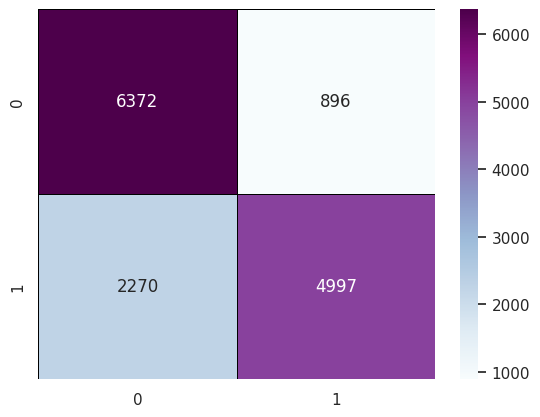

In [ ]:
rf_1 = RandomForestClassifier(class_weight='balanced',max_features=10,min_samples_split=2,min_samples_leaf=1, n_estimators= 300, bootstrap=False)
clf_rf_1 = rf_1.fit(X_train, y_train)
y_pred_1= clf_rf_1.predict(X_test)
conf_1 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_1, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_rf_1= clf_rf_1.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred_rf_1 , average = 'macro'))

0.8751771130249386


## K Neighbors

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.73      0.59      0.66      7268
           1       0.66      0.78      0.71      7267

    accuracy                           0.69     14535
   macro avg       0.69      0.69      0.68     14535
weighted avg       0.69      0.69      0.68     14535



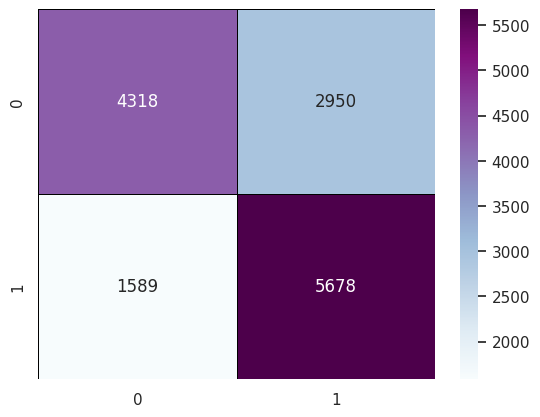

In [ ]:
knn=KNeighborsClassifier(weights='distance',n_neighbors=2)
clf_knn=knn.fit(X_train, y_train)
y_pred= clf_knn.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred1= clf_knn.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.7396908556476116


## AdaBoost

In [ ]:
AdaBoostClassifier()

AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      7268
           1       0.73      0.71      0.72      7267

    accuracy                           0.72     14535
   macro avg       0.72      0.72      0.72     14535
weighted avg       0.72      0.72      0.72     14535



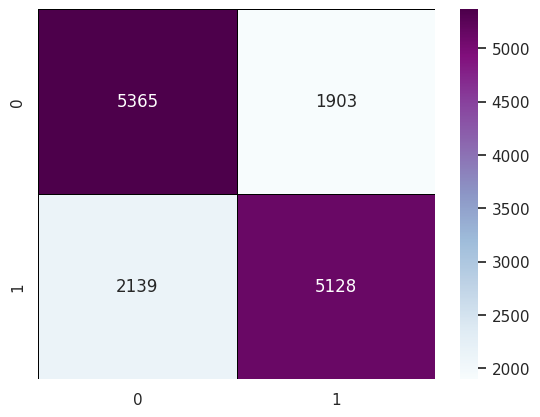

In [ ]:
ada=AdaBoostClassifier()
clf_ada=ada.fit(X_train, y_train)
y_pred= clf_ada.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred1= clf_ada.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.7999690665177033


## XGB

In [ ]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
scale_pos_weight = len(non_churn)/len(churn)
scale_pos_weight

2.4699884440214803

              precision    recall  f1-score   support

           0       0.81      0.52      0.64      7268
           1       0.65      0.88      0.75      7267

    accuracy                           0.70     14535
   macro avg       0.73      0.70      0.69     14535
weighted avg       0.73      0.70      0.69     14535



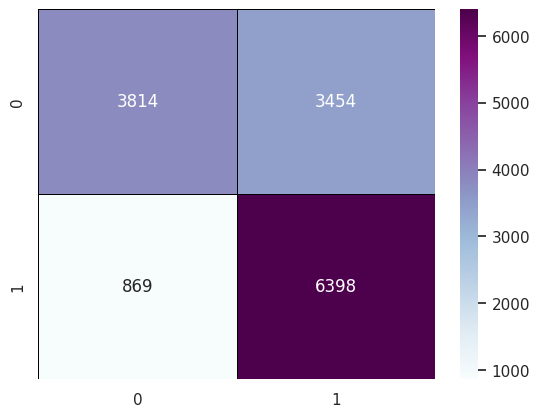

In [ ]:
xgb=XGBClassifier(max_depth=3, min_child_weight= 1, scale_pos_weight=scale_pos_weight,
                  learning_rate=0.1, n_estimators= 400,subsample=0.9,colsample_bytree=0.9)
clf_xgb=xgb.fit(X_train, y_train)

y_pred=clf_xgb.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

XGB: f1=0.747 auc=0.893


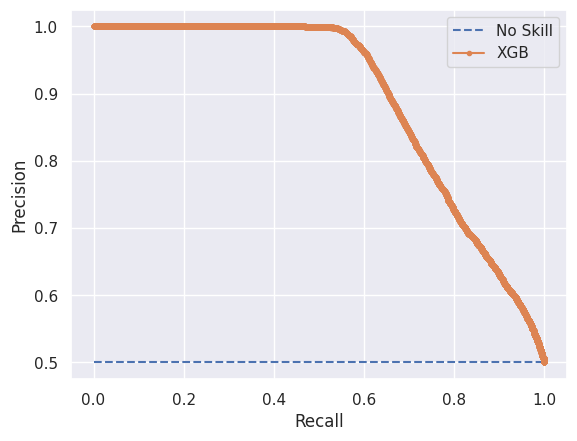

In [ ]:
probs =clf_xgb.predict_proba(X_test)
probs = probs[:, 1]
y_pred= clf_xgb.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

print('XGB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGB')

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

pyplot.legend()

pyplot.show()

In [ ]:
y_pred1= clf_xgb.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.8594756822084348


              precision    recall  f1-score   support

           0       0.81      0.52      0.64      7268
           1       0.65      0.88      0.75      7267

    accuracy                           0.70     14535
   macro avg       0.73      0.70      0.69     14535
weighted avg       0.73      0.70      0.69     14535



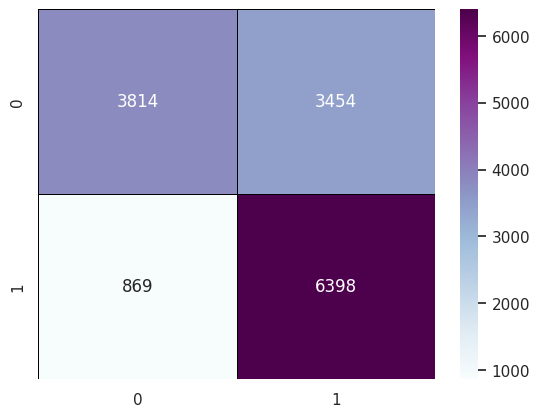

In [ ]:
xgb_1=XGBClassifier(max_depth=3, min_child_weight= 1, scale_pos_weight=scale_pos_weight,
                  learning_rate=0.1, n_estimators= 400,subsample=0.9,colsample_bytree=0.9)
clf_xgb_1=xgb_1.fit(X_train, y_train)

y_pred_3=clf_xgb_1.predict(X_test)
conf_2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_2, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred_3))

## LightGBM

In [ ]:
lgb.LGBMClassifier()

LGBMClassifier()

[LightGBM] [Info] Number of positive: 29069, number of negative: 29068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6891
[LightGBM] [Info] Number of data points in the train set: 58137, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000034
[LightGBM] [Info] Start training from score 0.000034
              precision    recall  f1-score   support

           0       0.81      0.49      0.61      7268
           1       0.64      0.88      0.74      7267

    accuracy                           0.69     14535
   macro avg       0.72      0.69      0.68     14535
weighted avg       0.72      0.69      0.68     14535



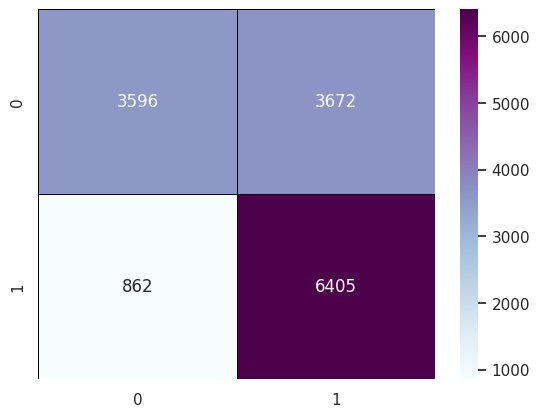

In [ ]:
lgbm=lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,learning_rate=0.3,n_estimators=70,
                   num_leaves=7,min_child_weight=0.001,min_child_samples=20)
clf_lgbm=lgbm.fit(X_train, y_train)
y_pred= clf_lgbm.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred1= clf_lgbm.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.8522969577948248


In [ ]:
#Hyperparameter Tuning
lgbm_param = {
    'num_leaves': [7, 15, 31],
    'n_estimators':[100,150,200,300]

}

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

gsearch_lgbm = GridSearchCV(estimator = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,
                                                           min_child_weight=0.001,min_child_samples=20),
                            param_grid = lgbm_param,
                            scoring='roc_auc',
                            verbose=3,
                            cv=skf)

grid_lgbm=gsearch_lgbm.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 23255, number of negative: 23254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6877
[LightGBM] [Info] Number of data points in the train set: 46509, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000043
[LightGBM] [Info] Start training from score 0.000043
[CV 1/5] END ....n_estimators=100, num_leaves=7;, score=0.845 total time=   1.2s
[LightGBM] [Info] Number of positive: 23255, number of negative: 23254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Ligh

In [ ]:
print("Best: %f using %s" % (grid_lgbm.best_score_, grid_lgbm.best_params_))

means = grid_lgbm.cv_results_['mean_test_score']
stds = grid_lgbm.cv_results_['std_test_score']
params = grid_lgbm.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.865882 using {'n_estimators': 300, 'num_leaves': 31}
0.847007 (0.001861) with: {'n_estimators': 100, 'num_leaves': 7}
0.858306 (0.002029) with: {'n_estimators': 100, 'num_leaves': 15}
0.863108 (0.001816) with: {'n_estimators': 100, 'num_leaves': 31}
0.853378 (0.002042) with: {'n_estimators': 150, 'num_leaves': 7}
0.861569 (0.002132) with: {'n_estimators': 150, 'num_leaves': 15}
0.864639 (0.001758) with: {'n_estimators': 150, 'num_leaves': 31}
0.856614 (0.001673) with: {'n_estimators': 200, 'num_leaves': 7}
0.863313 (0.002331) with: {'n_estimators': 200, 'num_leaves': 15}
0.865190 (0.001427) with: {'n_estimators': 200, 'num_leaves': 31}
0.860312 (0.001822) with: {'n_estimators': 300, 'num_leaves': 7}
0.864838 (0.002032) with: {'n_estimators': 300, 'num_leaves': 15}
0.865882 (0.001295) with: {'n_estimators': 300, 'num_leaves': 31}


# Feature_Importance

What features contribute more to predict the target (Churn)? let's find out how useful they are at predicting the target variable.

Random Forest algorithm offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

In [ ]:
RF_I = RandomForestClassifier(n_estimators=70, random_state=42)
RF_I.fit(X, y)

RandomForestClassifier(n_estimators=70, random_state=42)

In [ ]:
d = {'Features': X_train.columns, 'Feature Importance': RF_I.feature_importances_}
df = pd.DataFrame(d)
df_sorted = df.sort_values(by='Feature Importance', ascending = True)
df_sorted
df_sorted.style.background_gradient(cmap='Blues')

,Features,Feature Importance
19,CallForwardingCalls,0.000412
47,OwnsMotorcycle,0.000723
42,RetentionOffersAccepted,0.000947
37,OptOutMailings,0.000986
48,AdjustmentsToCreditRating,0.001815
41,RetentionCalls,0.002038
38,NonUSTravel,0.002308
45,ReferralsMadeBySubscriber,0.002926
34,RVOwner,0.003005
31,HandsetRefurbished,0.004409
